In [1]:
__author__ = 'Kayli Glidic'

# Import Library

In [2]:
#import the spectroscopic module from the tshirt pipeline
from tshirt.pipeline import spec_pipeline

#Import the required scripts: RECTE charge correction & Transit modeling functions
import Charge_Correction_Functions
from Charge_Correction_Functions import RECTE,RECTEMulti,calculate_correction_fast,charge_correction

#import basic plotting libraries/set plot settings
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
%matplotlib inline

#import bokeh to enable interactive plots
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
output_notebook()

#import yaml to read in the parameter file
import yaml

#Basic imports
import os
from astropy.table import QTable
import astropy.units as u
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join
import pandas as pd
from astropy.time import Time
from copy import deepcopy
import time
from multiprocessing import Pool

#modeling transit/eclipse light curves
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import batman
import corner
import emcee

#to fix errors
import pdb

#to correct for time differences
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

Could not import ccdproc, so image processing may not work


Loading BokehJS ...

Loading BokehJS ...

# Batch Processing the Spectroscopic Data on CoRoT-1 b
### Apwidth = 30.0

In [3]:
#read in yaml batch parameter file on CoRoT-1 b 
with open("corot1_batch_file.yaml", "r") as stream:
    bparamfile = yaml.safe_load(stream)

bparamfile

{'procFiles': ['/fenrirdata1/es_tso/hst/visit01/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit02/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit03/*_flt.fits',
  '/fenrirdata1/es_tso/hst/visit04/*_flt.fits'],
 'excludeList': ['ibh717giq_flt.fits',
  'ibh719gkq_flt.fits',
  'ibh720i5q_flt.fits',
  'ibh721olq_flt.fits'],
 'srcName': 'CoRoT-1',
 'srcNameShort': 'corot1',
 'nightName': ['visit1', 'visit2', 'visit3', 'visit4'],
 'dispDirection': 'x',
 'starPositions': [74],
 'refPhotCentering': None,
 'bkgSubDirections': ['Y'],
 'bkgRegionsX': [[None, None]],
 'bkgOrderX': 0,
 'bkgRegionsY': [[[9, 32], [41, 49], [92, 122]],
  [[0, 14], [25, 32], [39, 56], [100, 121]],
  [[9, 32], [39, 46], [92, 122]],
  [[9, 32], [39, 46], [92, 122]]],
 'bkgOrderY': 1,
 'apWidth': 30.0,
 'dispPixels': [0, 128],
 'numSplineKnots': 6,
 'splineSpecFitOrder': 2,
 'sigForBadPx': 300,
 'jdRef': 2457551,
 'timingMethod': None,
 'isCube': False,
 'cubePlane': 0,
 'doCentering': False,
 'FITSextension': 1,
 'HEADextens

In [4]:
bspec = spec_pipeline.batch_spec(batchFile='corot1_batch_file.yaml') #create a batch_spec object

Working on showStarChoices for batch CoRoT-1 corot1_visit1 
Working on showStarChoices for batch CoRoT-1 corot1_visit2 
Working on showStarChoices for batch CoRoT-1 corot1_visit3 
Working on showStarChoices for batch CoRoT-1 corot1_visit4 


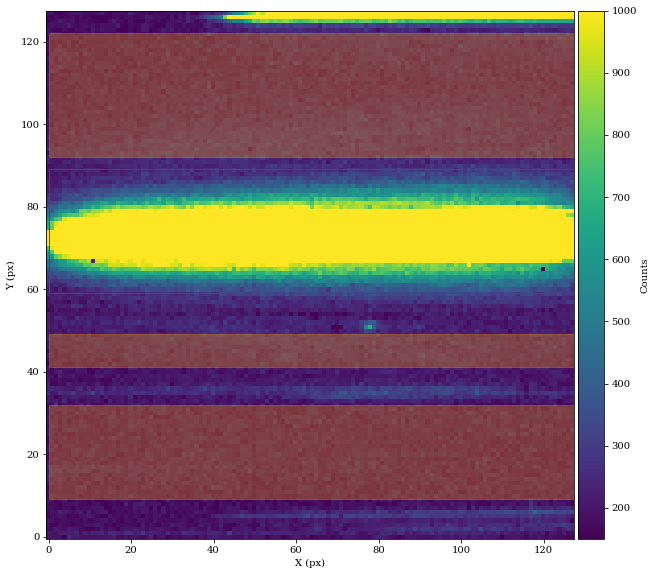

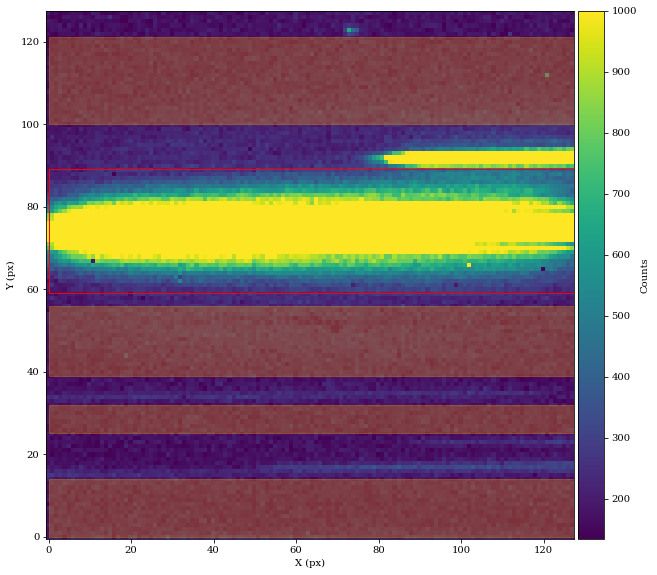

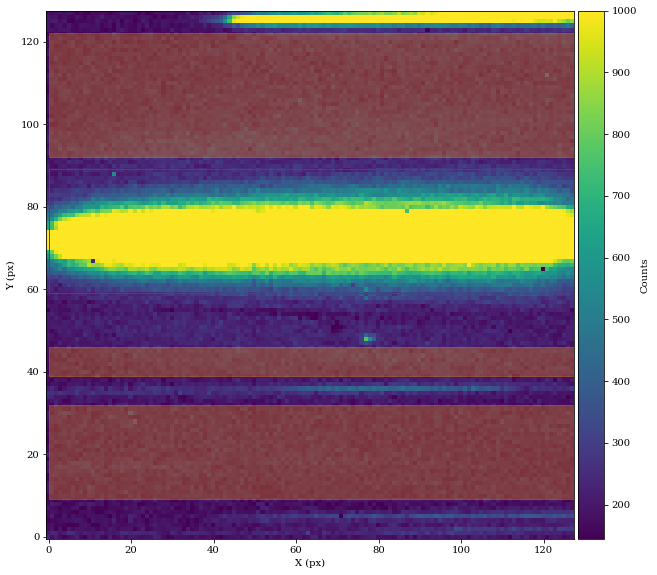

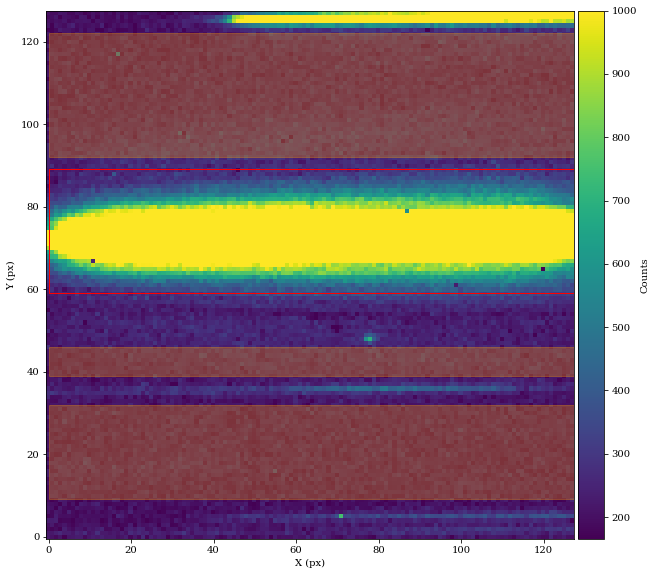

In [5]:
bspec.batch_run('showStarChoices',vmax=1000,showPlot=True,srcLabel=" ",figSize=(10,10)) #show the star choices for spectroscopy for each visit

In [6]:
bspec.batch_run('do_extraction',useMultiprocessing=True) #extract all spectroscopy

Working on do_extraction for batch CoRoT-1 corot1_visit1 


100%|██████████| 98/98 [00:02<00:00, 38.63it/s]


Working on do_extraction for batch CoRoT-1 corot1_visit2 


100%|██████████| 98/98 [00:02<00:00, 39.17it/s]


Working on do_extraction for batch CoRoT-1 corot1_visit3 


 66%|██████▋   | 65/98 [00:01<00:01, 22.11it/s]/home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/utils.py:113: UserWarning: Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data
  warnings.warn("Spline fitting failed because of Schoenberg-Whitney conditions. Trying to eliminate knots without sufficient data")
100%|██████████| 98/98 [00:02<00:00, 38.16it/s]


Working on do_extraction for batch CoRoT-1 corot1_visit4 


100%|██████████| 98/98 [00:02<00:00, 37.53it/s]


Working on plot_one_spec for batch CoRoT-1 corot1_visit1 


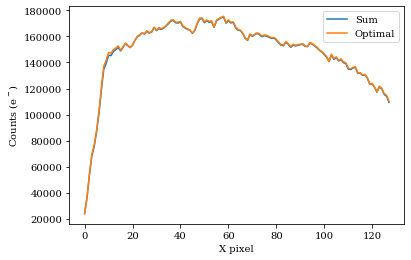

Working on plot_one_spec for batch CoRoT-1 corot1_visit2 


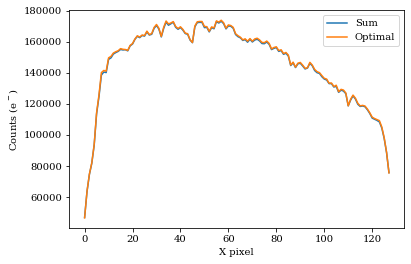

Working on plot_one_spec for batch CoRoT-1 corot1_visit3 


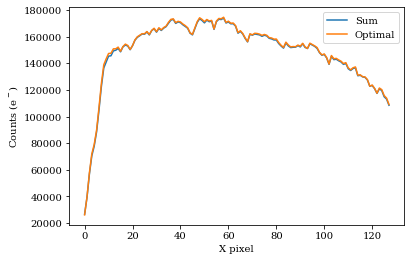

Working on plot_one_spec for batch CoRoT-1 corot1_visit4 


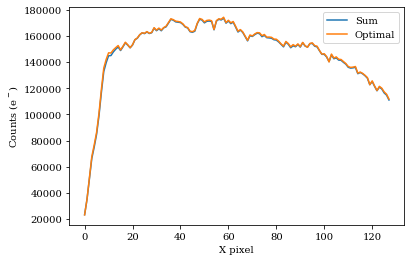

In [7]:
bspec.batch_run('plot_one_spec') #plot the spectrum of the source for each visit

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 


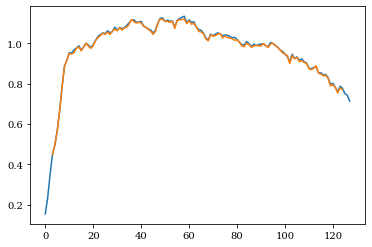

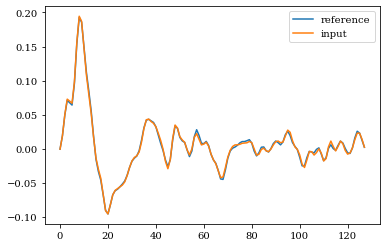

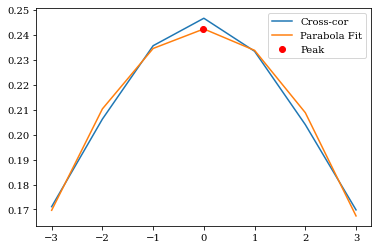

Shift = -0.023031650545340066, or index -0.023031650545340104


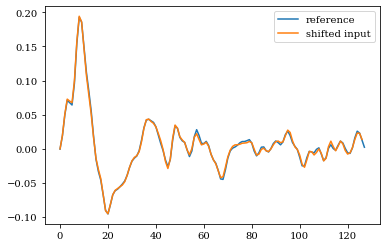

> /home/kglidic/miniconda3/envs/astroconda/lib/python3.6/site-packages/tshirt/pipeline/spec_pipeline.py(1171)align_spec()
-> align2D[imgInd,:] = utils.roll_pad(data2D[imgInd,:],offsetInd * self.param['specShiftMultiplier'])
(Pdb) q


BdbQuit: 

In [8]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True,alignDiagnostics=True) #Align all spectra and show the diagnostics of the alignment process

Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit1 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit2 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit3 
Working on plot_dynamic_spec for batch CoRoT-1 corot1_visit4 


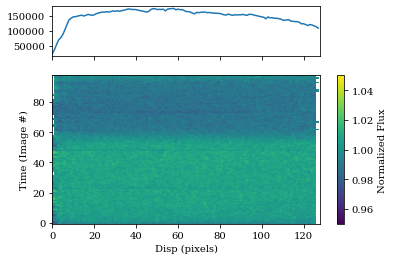

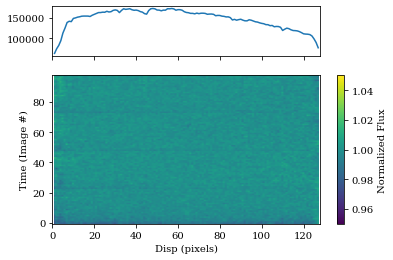

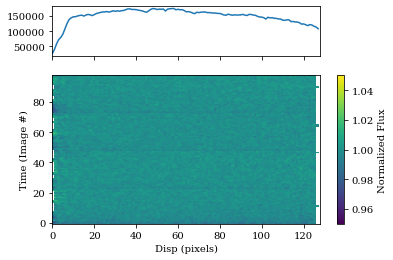

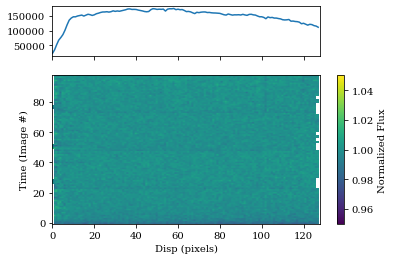

In [9]:
bspec.batch_run('plot_dynamic_spec', showPlot=True,align=True) #plot the dynamic spectrum for each visit

In [10]:
#Bin the wavelengths together and generate a time series from the aligned dynamic spectrum (`make_wavebin_series`)
#Plot a normalized lightcurve for wavelength-binned data one wavelength at a time with an offset between the lightcurves (`plot_wavebin_series`)

bspec.batch_run('make_wavebin_series',align=True,dispIndices=[10,118],recalculate=True,nbins=10) #Set dispersion indices based on alignment step above in `plot_dynamic_spec`and recalculate the dynamic spectrum..
bspec.batch_run('plot_wavebin_series', nbins=10, interactive=False,showPlot=False)

Working on make_wavebin_series for batch CoRoT-1 corot1_visit1 
Remaking dynamic spectrum...
Working on make_wavebin_series for batch CoRoT-1 corot1_visit2 
Remaking dynamic spectrum...
Working on make_wavebin_series for batch CoRoT-1 corot1_visit3 
Remaking dynamic spectrum...
Working on make_wavebin_series for batch CoRoT-1 corot1_visit4 
Remaking dynamic spectrum...
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit1 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit2 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit3 
Working on plot_wavebin_series for batch CoRoT-1 corot1_visit4 


In [11]:
#Return a spectrometry object for each visit so other methods and attributes can be explored
spec_v1 = bspec.return_spec_obj(ind=0)
spec_v2 = bspec.return_spec_obj(ind=1)
spec_v3 = bspec.return_spec_obj(ind=2)
spec_v4 = bspec.return_spec_obj(ind=3)

### Reading in Vist Data 

In [12]:
#read in result files
corot1_visit1_results = pd.read_csv('CSV_Visit_Files/corot1_visit1_results.csv')
corot1_visit2_results = pd.read_csv('CSV_Visit_Files/corot1_visit2_results.csv')
corot1_visit3_results = pd.read_csv('CSV_Visit_Files/corot1_visit3_results.csv')
corot1_visit4_results = pd.read_csv('CSV_Visit_Files/corot1_visit4_results.csv')

#read in median fit files
median_image_v1 = fits.getdata('Median_Images/corot1_visit1_median_image.fits')
median_image_v2 = fits.getdata('Median_Images/corot1_visit2_median_image.fits')
median_image_v3 = fits.getdata('Median_Images/corot1_visit3_median_image.fits')
median_image_v4 = fits.getdata('Median_Images/corot1_visit4_median_image.fits')

# Modeling Transit/Eclipses

In [13]:
def transit_model(x, rp, a, b):
    '''
    Models transit light curve based on initial parameters stored in params_transit.
    
    Parameters
    ----------
    
    x: array
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
    '''
    #Get the values specific to CoRoT-1b for planet radius and semi-major axis in units of stellar radii.
    Rstar = 1.230 * u.Rsun #CoRoT-1 star radius (in units of Solar radii) #Bonomo et al. 2017
    a_axis = 0.02752 * u.au #semi-major axis (in units of AU) #Bonomo et al. 2017
    a_over_r = (a_axis/Rstar).si.value #Calculated - semi-major axis (in units of stellar radii)

    params_transit = batman.TransitParams()                   #Object to store transit parameters
    
    params_transit.t0 = 2454138.32807 #Bonomo et al. 2017     #time of inferior conjunction (days)
    params_transit.per = 1.5089682    #Bonomo et al. 2017     #orbital period (days)
    params_transit.a = a_over_r       #Bonomo et al. 2017     #semi-major axis (in units of stellar radii)
    params_transit.inc =85.15         #Bonomo et al. 2017     #orbital inclination (in degrees)
    params_transit.ecc = 0.           #Bonomo et al. 2017     #eccentricity
    params_transit.w = 90.                                    #longitude of periastron (in degrees)
    params_transit.limb_dark = "nonlinear"                    #limb darkening model
    params_transit.u = [0.396, 0.571, -0.748, 0.286]                  #limb darkening coefficients [u1, u2, u3, u4]
    

    params_transit.rp = rp #planet radius will depend on input
    m = batman.TransitModel(params_transit, x)
    
    #Modifying the slope: Julian Date(x) - Initial Julian Date(x0) 
    x0 = np.min(x)
    flux = m.light_curve(params_transit)*(a+b*(x-x0))
    return flux

In [14]:
Rstar = 1.230 * u.Rsun #CoRoT-1 star radius (in units of Solar radii) #Bonomo et al. 2017
a_axis = 0.02752 * u.au #semi-major axis (in units of AU) #Bonomo et al. 2017
a_over_r = (a_axis/Rstar).si.value

In [15]:
Rstar = 1.230 * u.Rsun #CoRoT-1 star radius (in units of Solar radii) #Bonomo et al. 2017
a_axis = 0.02752 * u.au #semi-major axis (in units of AU) #Bonomo et al. 2017
a_over_r = (a_axis/Rstar)
a_over_r

<Quantity 0.02237398 AU / solRad>

In [16]:
#one must define the global parameters im, exptime, and xList for each visit
def transit_model_RECTE(x, rp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models transit light curve based on initial parameters stored in params_transit and RECTE charge trapping parameters. 
    
    Parameters
    ----------
    
    x: array
        Time in Julian days 
    rp: int
        Radius of the planet
    a: int
        Flux Normalization value
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
        
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dtrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
    
    dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    #Define the initial flux for the model based on the regular transit_model function
    flux = transit_model(x,rp,a,b)
    
    #Define the ramp in the initial flux
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    
    #return the modified flux based on the ramp in the data
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified


In [17]:
def eclipse_model(x, fp, a, b):
    '''
    Models eclipse light curve based on initial parameters stored in params_eclipse.
    
    Parameters
    ----------
    
    x: array
        Time in days 
        
    fp: int
        planet-to-star flux ratio
        
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    '''
    #Get the values specific to CoRoT-1b for planet radius and semi-major axis in units of stellar radii.
    rp =1.715 * u.Rjupiter #planet radius rp (in units of Jupiter radii)  #Bonomo et al. 2017
    Rstar = 1.230 * u.Rsun #CoRoT-1 star radius (in units of Solar radii) #Bonomo et al. 2017
    planet_radius = (rp/Rstar).si.value #Calculated - planet radius (in units of stellar radii)
    a_axis = 0.02752 * u.au #semi-major axis (in units of AU) #Bonomo et al. 2017
    a_over_r = (a_axis/Rstar).si.value #Calculated - semi-major axis (in units of stellar radii)
    
    params_eclipse = batman.TransitParams()       #object to store secondary eclipse parameters
    
    params_eclipse.t0 = 2454138.32807   #Bonomo et al. 2017         #time of inferior conjunction (days)
    params_eclipse.per = 1.5089682      #Bonomo et al. 2017         #orbital period (days)
    params_eclipse.rp =  planet_radius  #Bonomo et al. 2017         #planet radius (in units of stellar radii)
    params_eclipse.a = a_over_r         #Bonomo et al. 2017         #semi-major axis (in units of stellar radii)
    params_eclipse.inc =85.10           #Bonomo et al. 2017         #orbital inclination (in degrees)
    params_eclipse.ecc = 0.             #Bonomo et al. 2017         #eccentricity
    params_eclipse.w = 90.                                          #longitude of periastron (in degrees)
    params_eclipse.limb_dark = "nonlinear"                          #limb darkening model
    params_eclipse.u = [0.396, 0.571, -0.748, 0.286]                #limb darkening coefficients [u1, u2, u3, u4]
    params_eclipse.t_secondary = params_eclipse.t0 + 0.5* 1.5089682 #The central eclipse time
    
    params_eclipse.fp = fp/1000000 #planet-to-star flux ratio (fp) is in ppm
    m = batman.TransitModel(params_eclipse, x, transittype="secondary")
    
    #Modifying the slope: Julian Date(x) - Initial Julian Date(x0) 
    x0 = np.min(x)
    flux = m.light_curve(params_eclipse)*(a+b*(x-x0)) 
    return flux

In [18]:
#one must define the global parameters im, exptime, and xList for each visit
def eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f):
    '''
    Models eclipse light curve based on initial parameters stored in params_eclipse and RECTE charge trapping parameters.
    
    Parameters
    ----------
    
    x: array
        Time in days 
    fp: int
        Planet-to-flux ratio
    a: int
        Flux Normalization value
        
    b: int
        Slope Flux Normalization value
        
    trap_pop_s: int
        (default=0)number of initially occupied traps -- slow poplulation
    
    trap_pop_f: int
        (default=0)number of initially occupied traps -- fast poplulation
    
    dTrap_s: int
        (default=0, can be either number or list) number of extra
        trapped charge carriers added in the middle of two orbits
        -- slow population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
     dtrap_f: int
        (default=0, can be either number or list) number of extra
         trapped charge carriers added in the middle of two orbits
        -- fast population. If it is a number, it assumes that all
        the extra added trap charge carriers are the same
        
    '''
    global im
    global exptime
    global xList
    
    #Define the initial flux for the model based on the regular eclipse_model function
    flux = eclipse_model(x,fp,a,b)
    
    #Define the ramp in the initial flux
    ramp=calculate_correction_fast(x,exptime,im,xList=xList,trap_pop_s=trap_pop_s, dTrap_s=[dtrap_s], trap_pop_f=trap_pop_f, dTrap_f=[dtrap_f])
    
    #return the modified flux based on the ramp in the data
    flux_modified = flux*np.mean(ramp,axis=0)
    return flux_modified


In [19]:
def barycenter_correction(self):
    t1, t2 = self.get_wavebin_series()
    head = fits.getheader(self.fileL[0])
    #print("Time from tshirt: {}".format(t1['Time'][0]))
    
    expStartJD = head['EXPSTART'] + 2400000.5
    #print("Time from EXPSTART keyword {}".format(expStartJD))
    
    t1 = Time(t1['Time'][0],format='jd')
    coord = SkyCoord('06 48 19.1724141241 -03 06 07.710423478',unit=(u.hourangle,u.deg))
    loc = EarthLocation.of_site('keck')
    diff = t1.light_travel_time(coord,location=loc)
    #print('Travel Time from Keck to Barycenter= {} min'.format((diff / u.min).si))
    
    return (diff / u.day).si


In [20]:
def optimize_batman_model(self,model,nbins=10,showPlot=False):
    """
    Optimizes batman model light curves (for transits and/or secondary eclipses) based on initial parameters. 
    This function does not consider RECTE charge trapping parameters. 
    This function utilizies the scipy.optimize.curve_fit model fitting approach. 
    
    Parameters
    ----------
    
    self: keyword
        Spectrometry Object
    
    model: function
        A function that models either transits or secondary eclipses. Must be previously defined.
    
    nbins: int
        The number of wavelength bins. The Default is "nbins=10".
        
    showPlot: bool
        Make the plot visible? The Default is "False"
        
    """
   
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis columns as well as the corresponding errors.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction

    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
    
    #Define empty lists to store scipy.optimize.curve_fit results.
    popt_list=[] #Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
    pcov_list=[] #List of one standard deviation errors on the parameters. 
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model):
        text = 'fit: pr=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [0.13,1.0,0.0] #each guess value in the list corresponds to the parameter order in text
    elif(model ==eclipse_model):
        text = 'fit: fp=%5.3f, a=%5.3f, b=%5.3f'
        p0 = [500,1.0,0.0] #each guess value in the list corresponds to the parameter order in text
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    for columns, columns_errors, wavelength in zip(ydata_columns,ydata_errors_columns,wavelength_list):
        
        #Trim the data used in the model. Exclude the first orbit in each visit since RECTE is not optimized here and the ramp profile is still prevalent. 
        #Specific to CoRoT-1 b data, first orbit ends at data point 23. This will change depending on data. 
        xdata_trimmed = xdata[23:]  
        ydata_trimmed = raw_results[columns][23:]
        ydata_error_trimmed = raw_results_errors[columns_errors][23:].tolist() #Convert error data to a list in order to use in scipy.optimize.curve_fit 

        #Call and run scipy.optimize.curve_fit. 
        #Returns an array of optimal values for the parameters (popt) and an array for the the estimated covariance of popt (pcov).
        popt, pcov = curve_fit(model,xdata_trimmed,ydata_trimmed,sigma=ydata_error_trimmed,p0=p0)
       
        #Append these returned arrays into the previously defined empty lists.
        popt_list.append(popt)
        pcov_list.append(np.sqrt(np.diag(pcov))) #To compute one standard deviation errors on the parameters
        
        #Light Curve Plotting Options
        if(showPlot==True):
            
            fig, ax =plt.subplots() #Define the figure space
            
            #Plot all orbitial data but, the model excludes the first orbit.
            ax.plot(xdata_trimmed, model(xdata_trimmed, *popt), 'r-',
                    label=text % tuple(popt)) #The *popt will grab the optimized parameters required for the model. 

            ax.plot(xdata, raw_results[columns],'o') #Plot the time data vs. initial flux data
            
            #Axis labels
            ax.set_xlabel('Time (JD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('Wavelength ='+str(wavelength))

    return popt_list,pcov_list

In [21]:
def optimize_batman_model_RECTE(self,model,nbins=10,showPlot=False,recalculate=False):
    
    """
    Optimizes batman model light curves (for transits and/or secondary eclipses) based on initial parameters. 
    This function does consider RECTE charge trapping parameters. 
    This function utilizies the scipy.optimize.curve_fit model fitting approach. 
    
    Parameters
    ----------
    
    self: keyword
        Spectrometry Object
    
    model: function
        A function that models either transits or secondary eclipses that encorporate RECTE charge trapping parameters . 
        Must be previously defined.
    
    nbins: int
        The number of wavelength bins. The Default is "nbins=10".
        
    showPlot: bool
        Make the plot visible? The Default is "False"
        
    recalculate: bool
        Recalculate the model optimizations? The Default is "False"
        
    """
    
    global xList #Both applicable models for this function require an xList (Dispersion Range) parameter to be defined outside of the function itself. 
    
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis columns as well as the corresponding errors.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction
    
    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
    
    #Defining the global xList parameter needed in the model functions with RECTE
    xList_all = [] #empty list to store each wavlengths dispersion indices.
    #Loop over each wavelength's bin index. The dispersion indices will be different for each wavelength bin. 
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind] #Start of the dispersion range
        Disp_end = table_noise['Disp End'][ind] #End of the dispersion range
        Disp_xList = np.arange(Disp_st, Disp_end,1) #Return Numpy array of evenly spaced values within a given interval. 
        xList_all.append(Disp_xList) #Append Numpy array to the empty list to late be iterated over.
        
    #Define empty lists to store scipy.optimize.curve_fit results.
    popt_list=[] #Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
    pcov_list=[] #List of one standard deviation errors on the parameters. 
    
    #Plotting options
    if(showPlot==True):
        
        fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(20,10),sharey=False) #Set up the figure space
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model_RECTE):
        text = 'fit: rp=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [0.13,1.0,0.0,200,200,20,1] #each guess value in the list corresponds to the parameter order in text
    elif(model ==eclipse_model_RECTE):
        text = 'fit: fp=%5.3f, a=%5.3f,b=%5.3f,trap_pop_s=%5.3f,dtrap_s=%5.3f,trap_pop_f=%5.3f,dtrap_f=%5.3f'
        p0 = [500,1.0,0.0,200,200,20,1] #each guess value in the list corresponds to the parameter order in text
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Establsih a color map index, to be iterated over, based on the number of wavebins defined. 
    color_idx_range = np.linspace(0.3, 0.8, nbins)

    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    #Each wavelength will have an associated color (determined by the color index), bin number, and dispersion range.  
    for columns,columns_errors,disp_range,bin_number,color_idx,wavelength in zip(ydata_columns,ydata_errors_columns,xList_all,np.arange(nbins),color_idx_range,wavelength_list):
        
        xList = disp_range #The xList will correspond to the dispersion range. 

        ydata = raw_results[columns] #Return as a Numpy representation of the data.
        yerr = raw_results_errors[columns_errors]
        ydata_error_list = yerr.tolist() #Convert error data to a list in order to use in scipy.optimize.curve_fit 
        
        #This line is used to save results to a specific folder in order to streamline previously run data. (Can be altered)
        results_file = 'opt_result_tables/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

        #If the previously defined results_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(results_file) == True ) and (recalculate == False):
            dat = ascii.read(results_file)
            popt = np.array(dat['popt']) #read in the optimized parameter values
            pcov_diag = np.array(dat['pcov_diag']) #read in the one standard deviation errors on the parameters.
        
        #If the previously defined results_file does not exsit or if the recalculation parameter is set to True, call and run scipy.optimize.curve_fit 
        else:
            bounds =([-np.inf,0,-np.inf,0,0,0,0],[np.inf,np.inf,np.inf,500,500,200,200]) #set upper and lower limits for all parameters. Most importantly set the RECTE parameters limits to be within reason. 
            #Returns an array of optimal values for the parameters (popt) and an array for the the estimated covariance of popt (pcov).
            popt, pcov = curve_fit(model,xdata,ydata,sigma=ydata_error_list,p0=p0,bounds=bounds)
            pcov_diag = np.sqrt(np.diag(pcov)) #To compute one standard deviation errors on the parameters
            #Create a table for these results and save them to the results_file defined previously. 
            dat = Table()
            dat['popt'] = popt
            dat['pcov_diag'] = pcov_diag
            dat.write(results_file)

        #Append these returned arrays into the previously defined empty lists.
        popt_list.append(popt)
        pcov_list.append(pcov_diag)
        
        #Plotting Options
        if(showPlot==True):

            #This line is used to save light curve modeling results to a specific folder in order to streamline previously run data. (Can be altered)
            lightcurve_file = 'model_lightcurves/Fast&Slow_Trap_Populations_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)

            #If the previously defined lightcurve_file exists and the recalculation parameter is set to False, read it in. 
            if (os.path.exists(lightcurve_file) == True ) and (recalculate == False):
                dat = ascii.read(lightcurve_file)
                Time = np.array(dat['Time'])

                #Saftey check If the Time read does not match the xdata (time) within a tolerance raise an error. 
                if np.allclose(Time,xdata,rtol=1e-15) == False:
                    raise Exception("Times don't match")
                ymodel = np.array(dat['ymodel'])
                ramp_model = np.array(dat['ramp_model'])
                
            #If the previously defined lightcurve_file does not exsit or if the recalculation parameter is set to True, call and run the ramp model function (charge_correction_fast). 
            else: 
                ymodel = model(xdata, *popt) #define the model based on optimized parameters (*popt)
                ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=popt[3], dTrap_s=[popt[4]], trap_pop_f=popt[5], dTrap_f=[popt[6]]) #calculate the ramp in the data based on optimized parameters (popt)
                ramp_model = np.mean(ramp,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
                #Create a table for these results and save them to the lightcurve_file defined previously. 
                dat = Table()
                dat['Time'] = xdata
                dat['ymodel'] = ymodel
                dat['ramp_model'] = ramp_model
                dat.write(lightcurve_file)
                
            #Plots
            offset = 0.007 #set an offset between each wavelegnth's light curve.
            
            #The first plot (ax) is the original light curves with the models accounting for RECTE charge trapping parameters overlaid. 
            ax.plot(xdata, ymodel-bin_number*offset, 'r-',
                    label=text % tuple(popt)) #models accounting for RECTE parameters
            ax.plot(xdata, ydata-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),alpha=0.8) #original data
            
            #plot labels
            ax.set_xlabel('Time (BJD)')
            ax.set_ylabel('Normalized Flux')
            ax.set_title('CoRoT-1 b Light Curves')
            ax.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(ydata)-bin_number*offset+0.002),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
            
            
            #The second plot (ax2) is the original light curves with the ramp_model systematics divided out along with the models accounting for RECTE charge trapping parameters with the ramp_model divided out divided and overlaid. 
            ax2.plot(xdata, (ymodel/ramp_model)-bin_number*offset, 'r-',
                    label=text % tuple(popt)) #models with the ramp_model divided out accouting for the RECTE parameters 
            ax2.plot(xdata,(ydata/ramp_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),alpha=0.8) #original data with the ramp model divided out. 

            #Plot labels
            ax2.set_xlabel('Time (BJD)')
            ax2.set_title('CoRoT-1 b Light Curves/n Ramp Systematic Removed')
            ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(ydata)-bin_number*offset+0.005),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
        

            #The third plot (ax3) is the residuals of the original data from the model
            ax3.plot(xdata, (ydata-ymodel)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx))
            
            #Plot Labels
            ax3.set_ylabel('Residuals')
            ax3.set_xlabel('Time (BJD)')
            ax3.set_title('CoRoT-1 b Model Residuals')
            #ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.09, np.mean(raw_results[columns])-bin_number*offset+0.005),fontsize=15,color=plt.cm.gist_heat(color_idx)) #annotation for wavelength values
        
        #save figure options
        #figure_name='saved_figures/new_Corot1_{}_lightcurves.jpeg'.format(self.param['nightName'])   
        #fig.savefig(figure_name)

    return popt_list,pcov_list

## Modeling Visit 1 (Primary Transit)

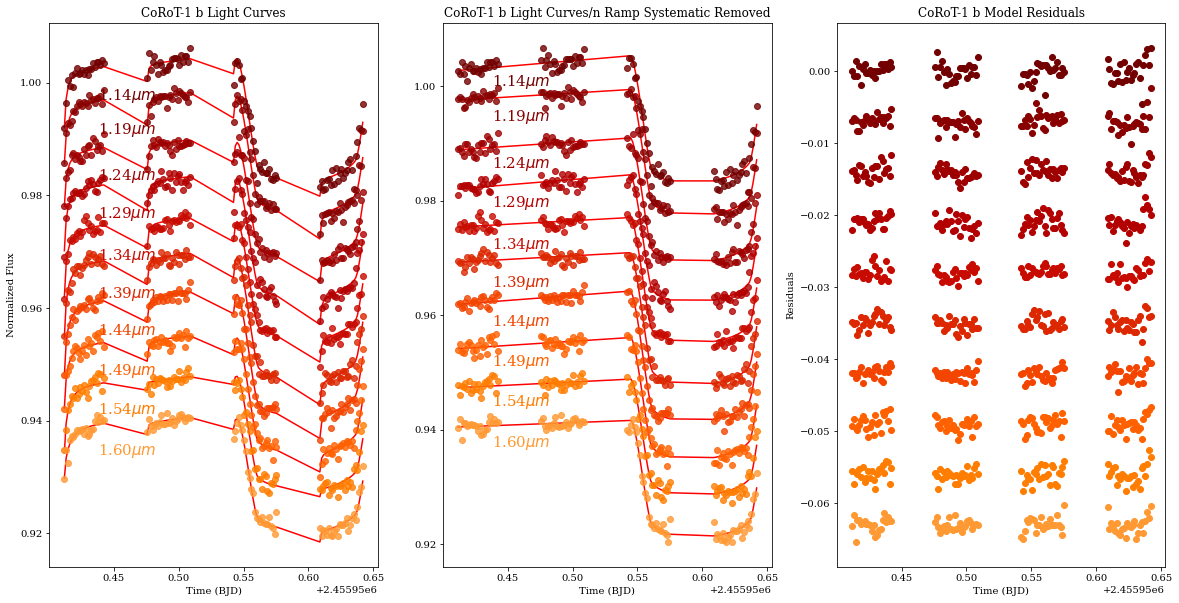

In [31]:
#Define the global parameters im, exptime for visit 1 from Previously read in saved results
info_v1 = corot1_visit1_results 
exptime = info_v1['Exp Time'][0]
im = median_image_v1

v1_wavebin_channels = optimize_batman_model_RECTE(spec_v1,transit_model_RECTE,nbins=10,showPlot=True)


In [23]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v1_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


## Modeling Visit 2,3,&4 (Secondary Eclipses)

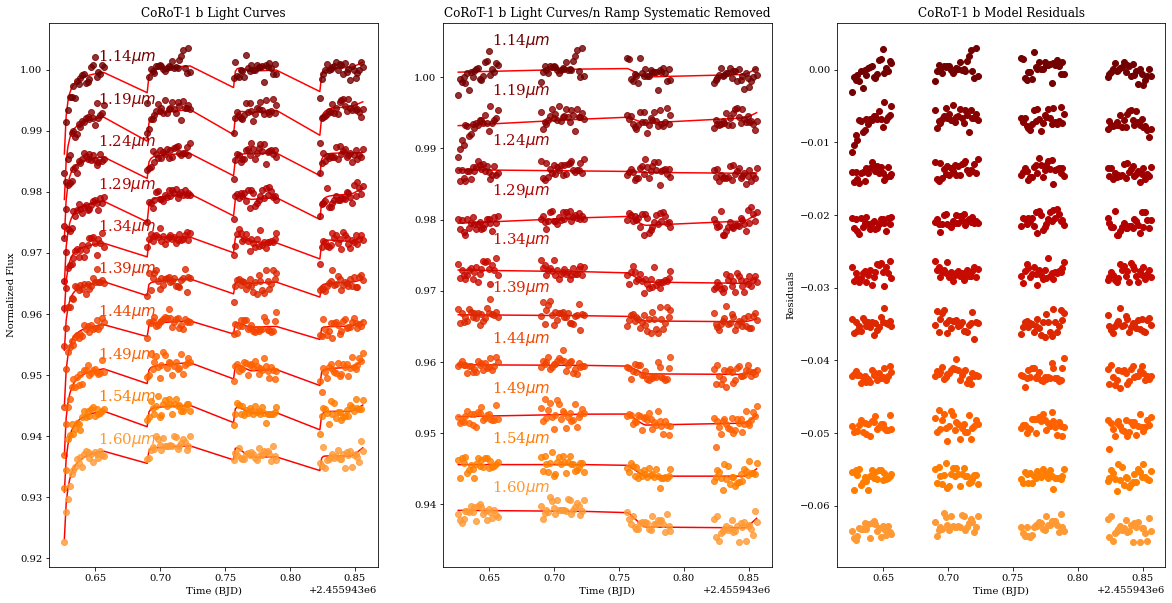

In [30]:
#Define the global parameters im, exptime for visit 2 from Previously read in saved results
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = median_image_v2

v2_wavebin_channels = optimize_batman_model_RECTE(spec_v2,eclipse_model_RECTE,nbins=10,showPlot=True)

In [25]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v2_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


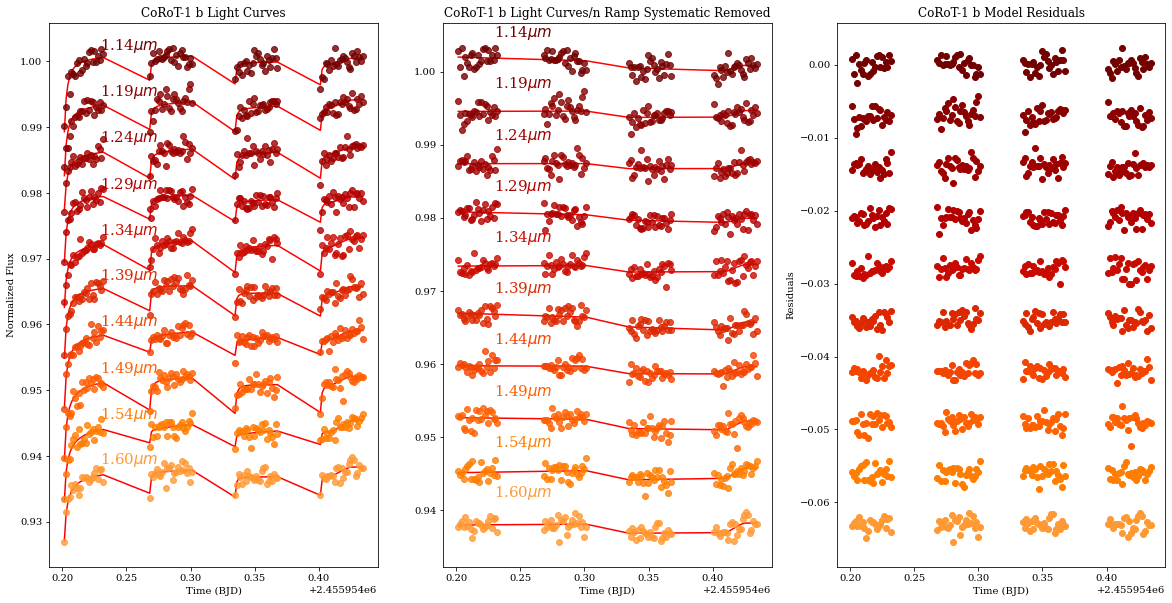

In [32]:
#Define the global parameters im, exptime for visit 3 from Previously read in saved results
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = median_image_v3

v3_wavebin_channels = optimize_batman_model_RECTE(spec_v3,eclipse_model_RECTE,nbins=10,showPlot=True)

In [27]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v3_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


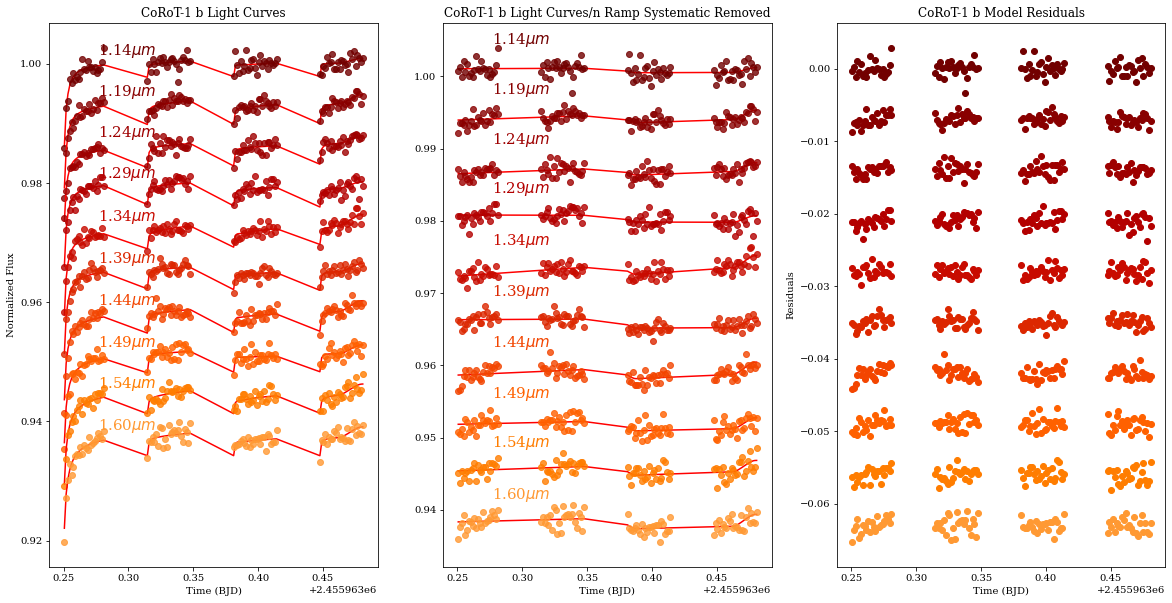

In [33]:
#Define the global parameters im, exptime for visit 4 from Previously read in saved results
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = median_image_v4

v4_wavebin_channels = optimize_batman_model_RECTE(spec_v4,eclipse_model_RECTE,nbins=10,showPlot=True)

In [29]:
#Counts number of nonfinite values in the optimized array of values
print("Number of non-finite Optimized Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[0]) == False)))

#Counts number of nonfinite values in the optimized error array of values
print("Number of non-finite Optimized Error Values ="+ " "+str(np.sum(np.isfinite(v4_wavebin_channels[1]) == False)))

Number of non-finite Optimized Values = 0
Number of non-finite Optimized Error Values = 0


# MCMC Analysis

In [34]:
#Define the log liklihood function; a natural logarithm of the liklihood
#Measures the goodness of fit of a statistical model to a sample of data for given values of the unknown parameters.
#Procedure for obtaining maximum likelihood estimation (the parameter values for the model such that they maximize the likelihood of this model actually being observed) is done in the function `MCMC`. 
def log_likelihood(theta, x, y, yerr):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #the unknown parameters, the blueprint for the model
    model = eclipse_model_RECTE(x, fp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f) #the model 
    return -0.5 * np.sum((y - model) ** 2 / yerr ** 2)

In [35]:
#Define prior knowledge of the parameters by setting bounds to restrict some parameters
def log_prior(theta):
    fp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #parameters
    
    #set bounds for the RECTE charge trapping parameters
    if 0.0 < trap_pop_s < 500 and 0.0 < dtrap_s < 500 and 0.0 < trap_pop_f < 200 and 0.0 < dtrap_f < 200 :
        return 0.0
    return -np.inf

In [36]:
#Set up the full log -probability function; combine the log prior and the log likelyhood 
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if np.isfinite(lp):
        return lp + log_likelihood(theta, x, y, yerr)
    return -np.inf

# transit 

In [ ]:
#Define the log liklihood function; a natural logarithm of the liklihood
#Measures the goodness of fit of a statistical model to a sample of data for given values of the unknown parameters.
#Procedure for obtaining maximum likelihood estimation (the parameter values for the model such that they maximize the likelihood of this model actually being observed) is done in the function `MCMC`. 
def log_likelihood(theta, x, y, yerr):
    rp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #the unknown parameters, the blueprint for the model
    model = transit_model_RECTE(x, rp, a, b, trap_pop_s, dtrap_s, trap_pop_f, dtrap_f) #the model 
    return -0.5 * np.sum((y - model) ** 2 / yerr ** 2)

In [ ]:
#Define prior knowledge of the parameters by setting bounds to restrict some parameters
def log_prior(theta):
    rp,a,b,trap_pop_s,dtrap_s,trap_pop_f,dtrap_f  = theta #parameters
    
    #set bounds for the RECTE charge trapping parameters
    if 0.0 < trap_pop_s < 500 and 0.0 < dtrap_s < 500 and 0.0 < trap_pop_f < 200 and 0.0 < dtrap_f < 200 :
        return 0.0
    return -np.inf

In [ ]:
#Set up the full log -probability function; combine the log prior and the log likelyhood 
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if np.isfinite(lp):
        return lp + log_likelihood(theta, x, y, yerr)
    return -np.inf

In [ ]:
def MCMC(self,model,iterations,nbins=10,recalculate=False,showPlot=False,LCPlot=False,Co_add_visit_check=False):
    
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis data as well as the corresponding errors.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction

    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Defining the global xList parameter needed in the model functions with RECTE
    xList_all = [] #empty list to store each wavlengths dispersion indices.
    #Loop over each wavelength's bin index. The dispersion indices will be different for each wavelength bin. 
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind] #Start of the dispersion range
        Disp_end = table_noise['Disp End'][ind] #End of the dispersion range
        Disp_xList = np.arange(Disp_st, Disp_end,1) #Return Numpy array of evenly spaced values within a given interval. 
        xList_all.append(Disp_xList) #Append Numpy array to the empty list to late be iterated over.
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')    
    
    #Define a LIST of initial guess error values for each parameter by calling the `optimize_batman_model_RECTE` function. This can also be a list of arrays, each array dedicated to a wavebin. 
    initial_error_list = optimize_batman_model_RECTE(self,model,nbins=nbins)[1]
    error_2D = np.array(initial_error_list) #Make the error list into an array
    bad_points = np.isfinite(error_2D) == False #Define any non-finite values in the array as bad points. 
    error_2D[bad_points] = np.nan #Replace bad points as nan values
    avg_error=np.nanmean(error_2D, axis=0) #average over each row. If only one list in the array,average will return the initial list.   
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model_RECTE):
        labels = ["rp", "a", "b","trap_pop_s","dtrap_s", "trap_pop_f", "dtrap_f"]
        p0 = [0.13,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
        
    elif(model==eclipse_model_RECTE):
        labels = ["fp", "a", "b","trap_pop_s","dtrap_s","trap_pop_f", "dtrap_f"]
        p0 = [500,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
    
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Define empty lists to store percentile computations
    q50_array =[] #50th, median
    q16_array =[] #16th, -1 std
    q84_array =[] #84th, +1 std
    
    #Establsih a color map index, to be iterated over, based on the number of wavebins defined. 
    color_idx_range = np.linspace(0.3, 0.8, nbins)
    
    #Set up plotting options for the Light Curve
    if (LCPlot==True):
        fig, (ax2, ax3, ax4) = plt.subplots(1,3,figsize=(20,10),sharey=False)
    
    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    #Each wavelength will have an associated color (determined by the color index) and bin number.  
    for columns,columns_errors,bin_number,color_idx, wavelength,disp_range in zip(ydata_columns,ydata_errors_columns,np.arange(nbins),color_idx_range,wavelength_list,xList_all):
        
        ydata = raw_results[columns].values # Return as a Numpy representation of the data.
        ydata_errors = raw_results_errors[columns_errors].values
        
        start_MLE = time.time() #Start of the internal timer for Maximum likelihood estimate

        #This line is used to save results to a specific folder in order to streamline previously run data. (Can be altered)
        result_file = 'opt_result_tables/MCMC20000_soln.x_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined results_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(result_file) == True) and (recalculate == False):
            dat = ascii.read(result_file)
            soln_xarray = dat['soln'] #read in the solution array,the numerical optimums of this likelihood function, the maximum liklihood estimates
            
        #If the previously defined results_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            #Create a table for these solution array and save them to the results_file defined previously. 
            dat = Table() 
            #run MCMC
            nll = lambda *args: -log_probability(*args) #Define a small anonymous function (nll using lambda) that take all arguments required of the log_probability function. Define the expession to be exectured as the log_probability function. 
            initial = np.array([p0[0],p0[1], p0[2], p0[3],p0[4],p0[5],p0[6]]) #Define the initial guess values
            soln = minimize(nll, initial, args=(xdata, ydata, ydata_errors)) #Run the scipy.optimize.minimize function to return optimization results.
            soln_xarray = soln.x #Grab and save the solution array. 
            dat['soln'] = soln['x']
            dat.write(result_file)
            
        end_MLE = time.time() #End of the internal timer for Maximum likelihood estimate
        MLE_time= end_MLE-start_MLE
        print("Maximum Likelihood Estimation Took {0:.1f} Seconds".format(MLE_time))


        nwalkers = 14 #Define the number of walkers in the ensemble (can vary)
        ndim = 7 #Define the number of parameters in model

        pos = np.empty([nwalkers,ndim]) # Define the shape of the initial state or position vector.
        
        #Loop through each element of each array simultaneously (The initial guess error value of each parameter, the MLE value for each parameter, and a range where the index of the returned array pertains to each parameter.  
        for i, j, k in zip(avg_error,soln_xarray,np.arange(ndim)):
            if k == 3 or k == 4:
                pos[:,k] = np.random.rand(nwalkers) * 500 #Confine the trap_pop_s and dtrap_s populations to a non-negative space with a limit at 500 (reasonable trap population bounds)
            elif k ==5 or k==6:
                pos[:,k] = np.random.rand(nwalkers) * 200 #Confine the trap_pop_f and dtrap_f populations to a non-negative space with a limit at 200 (reasonable trap population bounds)
            else: 
                pos[:,k] = j + i* np.random.randn(nwalkers)*10  #All other parameters initialized around the maximum likelihood results           
        
        #This line is used to save results to a specific folder in order to streamline previously run MCMC analysis. (Can be altered)
        MCMC_file = '/fenrirdata1/kg_data/sample_chains20000/MCMC20000_visits_{}_wavelength_ind_{}_nbins{}.h5'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined MCMC_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(MCMC_file) == True) and (recalculate == False):
            sampler = emcee.backends.HDFBackend(MCMC_file, read_only=True) #A reader for existing samplings
            check_step_size = sampler.get_chain() #Check the MCMC step size
            print(check_step_size.shape[0])

            #If the step size is less than the defined iterations in the function continue MCMC analysis
            if (check_step_size.shape[0] < iterations):
                print("Found "+str(check_step_size.shape[0])+" steps, running "+ str(iterations - check_step_size.shape[0])+ " more steps.")
                
                with Pool(16) as pool: #preform with multiprocessing
                    new_backend = emcee.backends.HDFBackend(MCMC_file) #In order to save additional emcee runs, rename the backend object
                    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors), backend=new_backend, pool=pool) #instantiating an EnsembleSampler for emcee
                    
                    #Iterate sampler for nsteps iterations and return the result. 
                    #Set initial state or position vector to NONE in order to resume where run_mcmc last was executed from. Set store=True to save runs. 
                    sampler.run_mcmc(None, iterations-check_step_size.shape[0], progress=True, store =True) 

        #If the previously defined MCMC_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            with Pool(16) as pool: #preform with multiprocessing
                
                start_MCMC = time.time() #Start of the internal timer for MCMC analysis

                backend = emcee.backends.HDFBackend(MCMC_file) #Create a backend that stores the chain in memory
                backend.reset(nwalkers, ndim) #clear in case file exists

                sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors),backend=backend,pool=pool) #instantiating an EnsembleSampler for emcee
                
                #Iterate sampler for nsteps iterations and return the result.Define initial state or position vector and set store=True to save runs. 
                sampler.run_mcmc(pos, iterations, progress=True,store=True);
                
                end_MCMC = time.time() #End of the internal timer for MCMC analysis
                MCMC_time = end_MCMC - start_MCMC
            print("MCMC Multiprocessing Analysis Took {0:.1f} Seconds".format(MCMC_time))
        
        tau = sampler.get_autocorr_time(quiet=True) #Compute an estimate of the autocorrelation time for each parameter. The parameter quiet=True will return a warning rather than stop the code. 

        burnin = int(2 * np.max(tau)) #Define the "burn-in" steps for each parameter based on its autocorrelation time. To be discarded.
        thin = int(0.5 * np.min(tau)) #Define how to thin the sampler chain. Take only every "thin" steps from the chain. 
        #print("The Autocorrelation Time is: {0}".format(tau))
        #print("The Burn-In Steps: {0}".format(burnin))
        #print("Thin the Sampler Chain by: {0}".format(thin))
        
        flat_samples = sampler.get_chain(discard=burnin,thin=thin,flat=True) # Flatten the chain so that we have a flat list of samples
        
        #Define the 50th Percentile for each parameter; the mean 
        q50 = np.percentile(flat_samples,50,axis=0)
        q50_array.append(q50)
        
        #Define the 16th Percentile for each parameter; -1 std
        q16 = np.percentile(flat_samples,16,axis=0)
        q16_array.append(q50-q16) #Define the lower unccertainty limit
        
        #Define the 84th Percentile for each parameter; +1 std
        q84 = np.percentile(flat_samples,84,axis=0)
        q84_array.append(q84-q50) #Define the upper unccertainty limit
            

        #Plotting options for the parameter distributions
        if(showPlot==True):
            fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True) #Set up the figure space
            
            samples = sampler.get_chain() #Get the stored chain of MCMC samples

            #Loop through each parameter
            for k in range(ndim):
                ax = axes[k]
                ax.plot(samples[:, :, k], "k", alpha=0.3) #Plot each parameter distribution 
                ax.set_xlim(0, len(samples))
                ax.set_ylabel(labels[k])
                #ax.yaxis.set_label_coords(-0.1, 0.5)
            axes[-1].set_xlabel("Step Number");
            
            pltcorner=corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],show_titles=True); #generate a corner plot for each wavebin
            pltcorner.savefig('saved_figures/CoRoT-1b_MCMC_corner_plot_visits_{}_wavelength_ind_{}_nbins{}.pdf'.format(self.param['nightName'],columns,nbins), bbox_inches='tight')
        #Light Curve Plotting
        if(LCPlot==True):
            
            offset = 0.007 #Define an offset between wavebins
        
            inds = np.random.randint(len(flat_samples), size=100) #Define, at random number, indices of the flat sample to generate models 
            
            family_of_models=[]
            family_of_models_params=[]
            #Loop through these indices
            for ind in inds:
                sample = flat_samples[ind] #Pull the parameter values at this index as a sample
                ymodel=model(xdata, *sample) #Plug in these sample values into the model function
                family_of_models.append(ymodel)
                family_of_models_params.append(sample)
                
                ramp_family=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=sample[3], dTrap_s=[sample[4]], trap_pop_f=sample[5], dTrap_f=[sample[6]]) #calculate the ramp in the data based on optimized parameters (sample)
                ramp_model_family = np.mean(ramp_family,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
                baseline_model_family=eclipse_model(xdata, 0, sample[1], sample[2]) #define the basline, to be divided out to see only the eclipse later
                
                ax2.plot(xdata, ymodel-bin_number*offset, color=plt.cm.gist_heat(color_idx), alpha=0.1) #Plot the family of models
                ax3.plot(xdata, (ymodel/ramp_model_family/baseline_model_family)-bin_number*offset, color=plt.cm.gist_heat(color_idx), alpha=0.1) #Plot the family of models

            ax2.errorbar(xdata, ydata-bin_number*offset, yerr=ydata_errors, color=plt.cm.gist_heat(color_idx), fmt="o", capsize=3,markersize=3) #Plot the light curves with error bars for each wavebin

            #log_pb = sampler.get_log_prob(discard=burnin,thin=thin,flat=True) #Get the chain of log probabilities evaluated at the MCMC samples
            #maximum_index = np.argmax(log_pb) #Define the maximum log probability
            #sample_max = flat_samples[maximum_index] #Pull the parameter values at this index of maximum log probability as sample_max
            #ymodel_max = model(xdata, *sample_max) #Plug in these sample_max values into the model function
            #ax2.plot(xdata, ymodel_max-bin_number*offset, color="black",linewidth=3) #Plot the Maximum Likelihood model
            median_model = np.median(family_of_models, axis=0)#Define the median in the family of models along rows (axis=0).
            median_model_params=np.median(family_of_models_params, axis=0) #Define the median in the family of models parameters along rows (axis=0)
            
            ax2.plot(xdata, median_model-bin_number*offset, color="black",linewidth=2) #Plot the mean model
            ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.085, np.mean(ydata)-bin_number*offset+0.009),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
            
            #Axis title specific to CoRoT-1b
            if self.param['nightName']=='visit1':
                fig.suptitle("CoRoT-1b Primary Transit \n Visit 1: $23^{rd}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Primary Transit \n Visit 1: $23^{rd}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit2':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 2: $17^{th}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 2: $17^{th}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit3':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 3: $27^{th}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 3: $27^{th}$ January 2012", fontsize=30)
            elif self.param['nightName']=='visit4':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 4: $5^{th}$ February 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 4: $5^{th}$ February 2012", fontsize=30)
    
            #Light Curve Plotting Labels/Legend
            ax2.set_ylabel("Normalized Flux + Offset", fontsize=20)
            ax3.set_xlabel("Time (BJD)", fontsize = 20)
            #ax2.tick_params(axis='x', labelsize=20)
            #ax2.tick_params(axis='y', labelsize=20)
            #ax2.xaxis.offsetText.set_fontsize(20)

            legend_elements = [Line2D([0], [0], color='black', lw=2, label='Median Model')]
            ax2.legend(handles=legend_elements, fontsize=10)
            ax3.legend(handles=legend_elements, fontsize=10)
            
            ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=median_model_params[3], dTrap_s=[median_model_params[4]], trap_pop_f=median_model_params[5], dTrap_f=[median_model_params[6]]) #calculate the ramp in the data based on optimized parameters (median_model_params)
            ramp_model = np.mean(ramp,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
            baseline_model=eclipse_model(xdata, 0, median_model_params[1], median_model_params[2]) #define the basline, to be divided out to see only the eclipse later
            
            ax3.plot(xdata, (ydata/ramp_model/baseline_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),markersize=5) 
            ax3.plot(xdata, (median_model/ramp_model/baseline_model)-bin_number*offset, color="black",linewidth=2) #Plot the mean model astrophysical data only
            ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.08, np.mean(ydata)-bin_number*offset+0.009),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot

            #The third plot (ax4) is the residuals of the original data from the median model
            ax4.plot(xdata, (ydata-median_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),markersize=5)
            ax4.yaxis.set_label_position("right")
            ax4.yaxis.tick_right()
            ax4.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.08, np.mean(ydata-median_model)-bin_number*offset+0.002),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
            ax4.set_ylabel("Residuals + Offset", fontsize=20)


            figure_name='saved_figures/CoRoT-1b_MCMCLightcurve_{}.pdf'.format(self.param['nightName'])   
            fig.savefig(figure_name)
        if (Co_add_visit_check==True):
            
            Orbital_phase = np.mod((xdata- 2454138.32807)/1.5089682,1.0) #convert the time in days into orbital phase. This is specifically for CoRoT-1 b. 
            
            #This line is used to save results to a specific folder in order to streamline previously run MCMC generated models. (Can be altered)
            Family_model_file  = 'Co_add_visit_check/Family_models_visit_{}_wavelength_ind_{}_nbins{}.txt'.format(self.param['nightName'],columns,nbins)
        
            #If the previously defined Family_model_file exists and the recalculation parameter is set to False, read it in. 
            if (os.path.exists(Family_model_file) == True ) and (recalculate == False):
                family_of_models=np.loadtxt(Family_model_file) #read in the txt file. This file contains a number of possible models for the respective wavelength bins. 
            
            #If the previously defined Family_model_file does not exsit or if the recalculation parameter is set to True, generate the possible light curve models and save.  
            else:
                family_of_models = [] #an empty list to append the models
                family_of_models.append(xdata) #apped the time data to these files for reference. 
                
                inds = np.random.randint(len(flat_samples), size=10) #Define, at random number, indices of the flat sample to generate models. Size (number of models) can vary 
                
                #Loop through these indices
                for ind in inds:
                    sample = flat_samples[ind] #Pull the parameter values at this index as a sample
                    ymodel=model(xdata, *sample) #Plug in these sample values into the model function
                    family_of_models.append(ymodel) #append the models for this bin into the empty list
                np.savetxt(Family_model_file,family_of_models) #save the family_of_models as a a text file under the destination Family_model_file
                
            #This line is used to save results to a specific folder in order to streamline previously run model modifications on the data. (Can be altered)
            modified_flux_file  = 'Co_add_visit_check/modified_flux_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
            
            #If the previously defined modified_flux_file exists and the recalculation parameter is set to False, read it in. 
            if (os.path.exists(modified_flux_file) == True ) and (recalculate == False):
                dat = ascii.read(modified_flux_file)
                orbital_phase=dat['Orbital Phase']
                mean_model_divided_out = dat['Modified Flux']
                
            #If the previously defined modified_flux_file does not exsit or if the recalculation parameter is set to True, modify the flux based on the mean model.  
            else:
                dat_table = Table()
                mean_model = np.mean(family_of_models[1:], axis=0) #Define the mean in the family of models along rows (axis=0). Ignore the first array (time). 
                mean_model_divided_out = ydata/mean_model #Divide the raw data by the mean model. 
                dat_table['Orbital Phase'] = Orbital_phase #save the orbital phase rather than time in days.
                dat_table['Modified Flux'] = mean_model_divided_out #save the modified flux values
                dat_table.write(modified_flux_file) #save the table  
    return q50_array,q16_array,q84_array,Orbital_phase

In [61]:
def MCMC(self,model,iterations,nbins=10,recalculate=False,showPlot=False,LCPlot=False,Co_add_visit_check=False):
    
    #Obtain a table of the the wavelength-binned time series. 
    #Seperate out the raw flux data (raw_results) and the raw flux error data (raw_results_errors) into two different pandas tables.
    results = self.get_wavebin_series(nbins=nbins)
    raw_results = results[0].to_pandas()
    raw_results_errors = results[1].to_pandas()
    
    #Call the barycenter time correction function. Will return correction in days. 
    time_correction = barycenter_correction(self)
    
    #Define the axis data as well as the corresponding errors.
    ydata_columns = raw_results.columns[1:].values #Skip over the time column
    ydata_errors_columns = raw_results_errors.columns[1:].values #Skip over the time column
    xdata = raw_results['Time'].values+time_correction #Time column data in terms of days accounting for Solar barycenter correction

    #Obtain a table of wavelength bins, with theoretical noise and measured standard deviation across time.
    table_noise = self.print_noise_wavebin(nbins=nbins)
    table_noise=table_noise.to_pandas() #convert to a pandas table
    
    #Defining the global xList parameter needed in the model functions with RECTE
    xList_all = [] #empty list to store each wavlengths dispersion indices.
    #Loop over each wavelength's bin index. The dispersion indices will be different for each wavelength bin. 
    for ind in table_noise.index: 
        Disp_st = table_noise['Disp St'][ind] #Start of the dispersion range
        Disp_end = table_noise['Disp End'][ind] #End of the dispersion range
        Disp_xList = np.arange(Disp_st, Disp_end,1) #Return Numpy array of evenly spaced values within a given interval. 
        xList_all.append(Disp_xList) #Append Numpy array to the empty list to late be iterated over.
    
    #Wavelength calibration to turn the dispersion pixels into wavelengths. 
    #CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism 
    wavelength_list = self.wavecal(table_noise['Disp Mid'],waveCalMethod = 'wfc3Dispersion')    
    
    #Define a LIST of initial guess error values for each parameter by calling the `optimize_batman_model_RECTE` function. This can also be a list of arrays, each array dedicated to a wavebin. 
    initial_error_list = optimize_batman_model_RECTE(self,model,nbins=nbins)[1]
    error_2D = np.array(initial_error_list) #Make the error list into an array
    bad_points = np.isfinite(error_2D) == False #Define any non-finite values in the array as bad points. 
    error_2D[bad_points] = np.nan #Replace bad points as nan values
    avg_error=np.nanmean(error_2D, axis=0) #average over each row. If only one list in the array,average will return the initial list.   
    
    #Establish the model in use based on initial function input. Establish the parameters and the initial parameter guess values (p0) for each model. 
    if(model==transit_model_RECTE):
        labels = ["rp", "a", "b","trap_pop_s","dtrap_s", "trap_pop_f", "dtrap_f"]
        p0 = [0.13,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
        
    elif(model==eclipse_model_RECTE):
        labels = ["fp", "a", "b","trap_pop_s","dtrap_s","trap_pop_f", "dtrap_f"]
        p0 = [500,1.0,0.0,200,100,20,1] #each guess value in the list corresponds to the parameter order in text
    
    else: 
        print("Invalid Model Input") #This function only works on the above previously defined models!
    
    #Define empty lists to store percentile computations
    q50_array =[] #50th, median
    q16_array =[] #16th, -1 std
    q84_array =[] #84th, +1 std
    
    #Establsih a color map index, to be iterated over, based on the number of wavebins defined. 
    color_idx_range = np.linspace(0.3, 0.8, nbins)
    
    #Set up plotting options for the Light Curve
    if (LCPlot==True):
        fig, (ax2, ax3, ax4) = plt.subplots(1,3,figsize=(20,10),sharey=False)
    
    #Loop over the flux data and their respective flux data error columns simultaneously for each wavelength. 
    #Each wavelength will have an associated color (determined by the color index) and bin number.  
    for columns,columns_errors,bin_number,color_idx, wavelength,disp_range in zip(ydata_columns,ydata_errors_columns,np.arange(nbins),color_idx_range,wavelength_list,xList_all):
        
        ydata = raw_results[columns].values # Return as a Numpy representation of the data.
        ydata_errors = raw_results_errors[columns_errors].values
        
        start_MLE = time.time() #Start of the internal timer for Maximum likelihood estimate

        #This line is used to save results to a specific folder in order to streamline previously run data. (Can be altered)
        result_file = 'opt_result_tables/MCMC20000_soln.x_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined results_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(result_file) == True) and (recalculate == False):
            dat = ascii.read(result_file)
            soln_xarray = dat['soln'] #read in the solution array,the numerical optimums of this likelihood function, the maximum liklihood estimates
            
        #If the previously defined results_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            #Create a table for these solution array and save them to the results_file defined previously. 
            dat = Table() 
            #run MCMC
            nll = lambda *args: -log_probability(*args) #Define a small anonymous function (nll using lambda) that take all arguments required of the log_probability function. Define the expession to be exectured as the log_probability function. 
            initial = np.array([p0[0],p0[1], p0[2], p0[3],p0[4],p0[5],p0[6]]) #Define the initial guess values
            soln = minimize(nll, initial, args=(xdata, ydata, ydata_errors)) #Run the scipy.optimize.minimize function to return optimization results.
            soln_xarray = soln.x #Grab and save the solution array. 
            dat['soln'] = soln['x']
            dat.write(result_file)
            
        end_MLE = time.time() #End of the internal timer for Maximum likelihood estimate
        MLE_time= end_MLE-start_MLE
        print("Maximum Likelihood Estimation Took {0:.1f} Seconds".format(MLE_time))


        nwalkers = 14 #Define the number of walkers in the ensemble (can vary)
        ndim = 7 #Define the number of parameters in model

        pos = np.empty([nwalkers,ndim]) # Define the shape of the initial state or position vector.
        
        #Loop through each element of each array simultaneously (The initial guess error value of each parameter, the MLE value for each parameter, and a range where the index of the returned array pertains to each parameter.  
        for i, j, k in zip(avg_error,soln_xarray,np.arange(ndim)):
            if k == 3 or k == 4:
                pos[:,k] = np.random.rand(nwalkers) * 500 #Confine the trap_pop_s and dtrap_s populations to a non-negative space with a limit at 500 (reasonable trap population bounds)
            elif k ==5 or k==6:
                pos[:,k] = np.random.rand(nwalkers) * 200 #Confine the trap_pop_f and dtrap_f populations to a non-negative space with a limit at 200 (reasonable trap population bounds)
            else: 
                pos[:,k] = j + i* np.random.randn(nwalkers)*10  #All other parameters initialized around the maximum likelihood results           
        
        #This line is used to save results to a specific folder in order to streamline previously run MCMC analysis. (Can be altered)
        MCMC_file = '/fenrirdata1/kg_data/sample_chains20000/MCMC20000_visits_{}_wavelength_ind_{}_nbins{}.h5'.format(self.param['nightName'],columns,nbins)
        
        #If the previously defined MCMC_file exists and the recalculation parameter is set to False, read it in. 
        if (os.path.exists(MCMC_file) == True) and (recalculate == False):
            sampler = emcee.backends.HDFBackend(MCMC_file, read_only=True) #A reader for existing samplings
            check_step_size = sampler.get_chain() #Check the MCMC step size
            print(check_step_size.shape[0])

            #If the step size is less than the defined iterations in the function continue MCMC analysis
            if (check_step_size.shape[0] < iterations):
                print("Found "+str(check_step_size.shape[0])+" steps, running "+ str(iterations - check_step_size.shape[0])+ " more steps.")
                
                with Pool(16) as pool: #preform with multiprocessing
                    new_backend = emcee.backends.HDFBackend(MCMC_file) #In order to save additional emcee runs, rename the backend object
                    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors), backend=new_backend, pool=pool) #instantiating an EnsembleSampler for emcee
                    
                    #Iterate sampler for nsteps iterations and return the result. 
                    #Set initial state or position vector to NONE in order to resume where run_mcmc last was executed from. Set store=True to save runs. 
                    sampler.run_mcmc(None, iterations-check_step_size.shape[0], progress=True, store =True) 

        #If the previously defined MCMC_file does not exsit or if the recalculation parameter is set to True, call and run the scipy.optimize.minimize function. 
        else:
            with Pool(16) as pool: #preform with multiprocessing
                
                start_MCMC = time.time() #Start of the internal timer for MCMC analysis

                backend = emcee.backends.HDFBackend(MCMC_file) #Create a backend that stores the chain in memory
                backend.reset(nwalkers, ndim) #clear in case file exists

                sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, ydata_errors),backend=backend,pool=pool) #instantiating an EnsembleSampler for emcee
                
                #Iterate sampler for nsteps iterations and return the result.Define initial state or position vector and set store=True to save runs. 
                sampler.run_mcmc(pos, iterations, progress=True,store=True);
                
                end_MCMC = time.time() #End of the internal timer for MCMC analysis
                MCMC_time = end_MCMC - start_MCMC
            print("MCMC Multiprocessing Analysis Took {0:.1f} Seconds".format(MCMC_time))
        
        tau = sampler.get_autocorr_time(quiet=True) #Compute an estimate of the autocorrelation time for each parameter. The parameter quiet=True will return a warning rather than stop the code. 

        burnin = int(2 * np.max(tau)) #Define the "burn-in" steps for each parameter based on its autocorrelation time. To be discarded.
        thin = int(0.5 * np.min(tau)) #Define how to thin the sampler chain. Take only every "thin" steps from the chain. 
        #print("The Autocorrelation Time is: {0}".format(tau))
        print("The Burn-In Steps: {0}".format(burnin))
        print("Thin the Sampler Chain by: {0}".format(thin))
        
        flat_samples = sampler.get_chain(discard=burnin,thin=thin,flat=True) # Flatten the chain so that we have a flat list of samples
        print(flat_samples.shape)
        print(sampler.get_chain().shape)
        print(sampler.get_chain(flat=True).shape)

        #Define the 50th Percentile for each parameter; the mean 
        q50 = np.percentile(flat_samples,50,axis=0)
        q50_array.append(q50)
        
        #Define the 16th Percentile for each parameter; -1 std
        q16 = np.percentile(flat_samples,16,axis=0)
        q16_array.append(q50-q16) #Define the lower unccertainty limit
        
        #Define the 84th Percentile for each parameter; +1 std
        q84 = np.percentile(flat_samples,84,axis=0)
        q84_array.append(q84-q50) #Define the upper unccertainty limit
            
        Orbital_phase = np.mod((xdata- 2454138.32807)/1.5089682,1.0) #convert the time in days into orbital phase. This is specifically for CoRoT-1 b. 

        #Plotting options for the parameter distributions
        if(showPlot==True):
            fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True) #Set up the figure space
            
            samples = sampler.get_chain() #Get the stored chain of MCMC samples

            #Loop through each parameter
            for k in range(ndim):
                ax = axes[k]
                ax.plot(samples[:, :, k], "k", alpha=0.3) #Plot each parameter distribution 
                ax.set_xlim(0, len(samples))
                ax.set_ylabel(labels[k])
                #ax.yaxis.set_label_coords(-0.1, 0.5)
            axes[-1].set_xlabel("Step Number");
            
            pltcorner=corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],show_titles=True); #generate a corner plot for each wavebin
            pltcorner.savefig('saved_figures/CoRoT-1b_MCMC_corner_plot_visits_{}_wavelength_ind_{}_nbins{}.pdf'.format(self.param['nightName'],columns,nbins), bbox_inches='tight')
        #Light Curve Plotting
        if(LCPlot==True):
            
            offset = 0.007 #Define an offset between wavebins
        
            inds = np.random.randint(len(flat_samples), size=100) #Define, at random number, indices of the flat sample to generate models 
            
            family_of_models=[]
            family_of_models_params=[]
            #Loop through these indices
            for ind in inds:
                sample = flat_samples[ind] #Pull the parameter values at this index as a sample
                ymodel=model(xdata, *sample) #Plug in these sample values into the model function
                family_of_models.append(ymodel)
                family_of_models_params.append(sample)
                
                ramp_family=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=sample[3], dTrap_s=[sample[4]], trap_pop_f=sample[5], dTrap_f=[sample[6]]) #calculate the ramp in the data based on optimized parameters (sample)
                ramp_model_family = np.mean(ramp_family,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
                baseline_model_family=eclipse_model(xdata, 0, sample[1], sample[2]) #define the basline, to be divided out to see only the eclipse later
                
                ax2.plot(xdata, ymodel-bin_number*offset, color=plt.cm.gist_heat(color_idx), alpha=0.1) #Plot the family of models
                ax3.plot(xdata, (ymodel/ramp_model_family/baseline_model_family)-bin_number*offset, color=plt.cm.gist_heat(color_idx), alpha=0.1) #Plot the family of models

            ax2.errorbar(xdata, ydata-bin_number*offset, yerr=ydata_errors, color=plt.cm.gist_heat(color_idx), fmt="o", capsize=3,markersize=3) #Plot the light curves with error bars for each wavebin

            #log_pb = sampler.get_log_prob(discard=burnin,thin=thin,flat=True) #Get the chain of log probabilities evaluated at the MCMC samples
            #maximum_index = np.argmax(log_pb) #Define the maximum log probability
            #sample_max = flat_samples[maximum_index] #Pull the parameter values at this index of maximum log probability as sample_max
            #ymodel_max = model(xdata, *sample_max) #Plug in these sample_max values into the model function
            #ax2.plot(xdata, ymodel_max-bin_number*offset, color="black",linewidth=3) #Plot the Maximum Likelihood model
            median_model = np.median(family_of_models, axis=0)#Define the median in the family of models along rows (axis=0).
            median_model_params=np.median(family_of_models_params, axis=0) #Define the median in the family of models parameters along rows (axis=0)
            
            ax2.plot(xdata, median_model-bin_number*offset, color="black",linewidth=2) #Plot the mean model
            
            #Axis title specific to CoRoT-1b
            if self.param['nightName']=='visit1':
                fig.suptitle("CoRoT-1b Primary Transit \n Visit 1: $23^{rd}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Primary Transit \n Visit 1: $23^{rd}$ January 2012", fontsize=30)
                ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.085, np.mean(ydata)-bin_number*offset+0.009),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.08, np.mean(ydata)-bin_number*offset+0.0085),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax4.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.08, np.mean(ydata-median_model)-bin_number*offset+0.0015),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot

            elif self.param['nightName']=='visit2':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 2: $17^{th}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 2: $17^{th}$ January 2012", fontsize=30)
                ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.085, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax4.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata-median_model)-bin_number*offset+0.002),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
            elif self.param['nightName']=='visit3':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 3: $27^{th}$ January 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 3: $27^{th}$ January 2012", fontsize=30)
                ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.085, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax4.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata-median_model)-bin_number*offset+0.002),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
            elif self.param['nightName']=='visit4':
                fig.suptitle("CoRoT-1b Secondary Eclipse \n Visit 4: $5^{th}$ February 2012", fontsize=30)
                #ax2.set_title("CoRoT-1b Secondary Eclipse \n Visit 4: $5^{th}$ February 2012", fontsize=30)
                ax2.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.085, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax3.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata)-bin_number*offset+0.005),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
                ax4.annotate("{:.2f}$\mu m$".format(wavelength), xy =(np.mean(xdata)-0.078, np.mean(ydata-median_model)-bin_number*offset+0.002),fontsize=10,weight='bold',color=plt.cm.gist_heat(color_idx)) #Annotate the wavelengths on the plot
    
            #Light Curve Plotting Labels/Legend
            ax2.set_ylabel("Normalized Flux + Offset", fontsize=20)
            ax3.set_xlabel("Time (BJD)", fontsize = 20)
            #ax2.tick_params(axis='x', labelsize=20)
            #ax2.tick_params(axis='y', labelsize=20)
            #ax2.xaxis.offsetText.set_fontsize(20)

            legend_elements = [Line2D([0], [0], color='black', lw=2, label='Median Model')]
            ax2.legend(handles=legend_elements, fontsize=10)
            ax3.legend(handles=legend_elements, fontsize=10)
            
            ramp=calculate_correction_fast(xdata,exptime,im,xList=xList,trap_pop_s=median_model_params[3], dTrap_s=[median_model_params[4]], trap_pop_f=median_model_params[5], dTrap_f=[median_model_params[6]]) #calculate the ramp in the data based on optimized parameters (median_model_params)
            ramp_model = np.mean(ramp,axis=0) #Defing the ramp model; the mean along the rows(axis=0)
            baseline_model=eclipse_model(xdata, 0, median_model_params[1], median_model_params[2]) #define the basline, to be divided out to see only the eclipse later
            
            ax3.plot(xdata, (ydata/ramp_model/baseline_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),markersize=5) 
            ax3.plot(xdata, (median_model/ramp_model/baseline_model)-bin_number*offset, color="black",linewidth=2) #Plot the mean model astrophysical data only

            #The third plot (ax4) is the residuals of the original data from the median model
            ax4.plot(xdata, (ydata-median_model)-bin_number*offset,'o',color=plt.cm.gist_heat(color_idx),markersize=5)
            ax4.yaxis.set_label_position("right")
            ax4.yaxis.tick_right()
            ax4.set_ylabel("Residuals + Offset", fontsize=20)


            figure_name='saved_figures/CoRoT-1b_MCMCLightcurve_{}.pdf'.format(self.param['nightName'])   
            fig.savefig(figure_name)
            
        if (Co_add_visit_check==True):
            
            #This line is used to save results to a specific folder in order to streamline previously run model modifications on the data. (Can be altered)
            corrected_light_curve_file  = 'Co_add_visit_check/corrected_light_curve_visit_{}_wavelength_ind_{}_nbins{}.csv'.format(self.param['nightName'],columns,nbins)
            
            #If the previously defined modified_flux_file exists and the recalculation parameter is set to False, read it in. 
            if (os.path.exists(corrected_light_curve_file) == True ) and (recalculate == False):
                print("File found.")
                
            #If the previously defined modified_flux_file does not exsit or if the recalculation parameter is set to True, modify the flux based on the mean model.  
            else:
                dat_table = Table()
                corrected_light_curve = ydata/ramp_model/baseline_model
                dat_table['Orbital Phase'] = Orbital_phase #save the orbital phase rather than time in days.
                dat_table['Modified Flux'] = corrected_light_curve #save the modified flux values
                dat_table.write(corrected_light_curve_file) #save the table  
    return q50_array,q16_array,q84_array,Orbital_phase

Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 593
Thin the Sampler Chain by: 58
(4676, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 291
Thin the Sampler Chain by: 46
(5992, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 332
Thin the Sampler Chain by: 50
(5502, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000


The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [184.89845249 185.80972758 381.97469428 555.08593363 657.21622398
 549.14213075 711.94116216]


The Burn-In Steps: 1423
Thin the Sampler Chain by: 92
(2814, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000


The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [273.01663923 143.69650688 147.2744865  488.36968187 231.70744339
 677.91854438 321.55752789]


The Burn-In Steps: 1355
Thin the Sampler Chain by: 71
(3668, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 596
Thin the Sampler Chain by: 45
(6034, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [135.20209664 119.98953732 112.08657026 129.92331683 417.01871421
 253.3699735   83.16227269]


The Burn-In Steps: 834
Thin the Sampler Chain by: 41
(6538, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 460
Thin the Sampler Chain by: 55
(4970, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 369
Thin the Sampler Chain by: 55
(4984, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [139.82795155 113.77415724 157.58582363 116.3569655  411.6962846
 132.16727625 106.5721268 ]


The Burn-In Steps: 823
Thin the Sampler Chain by: 53
(5054, 7)
(20000, 14, 7)
(280000, 7)
Runtime of the program is 737.6691417694092 seconds


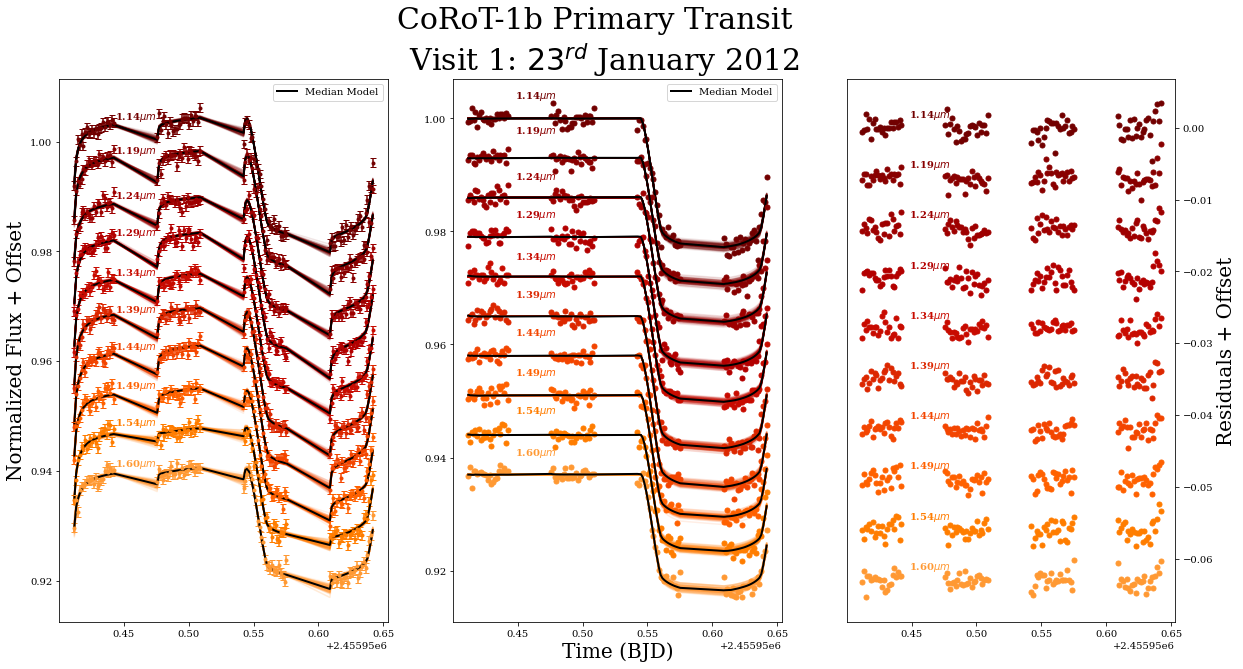

In [60]:
info_v1 = corot1_visit1_results
exptime = info_v1['Exp Time'][0]
im = median_image_v1

start = time.time()
sampler_1 = MCMC(spec_v1,transit_model_RECTE,20000,nbins=10,recalculate=False,showPlot=False,LCPlot=True,Co_add_visit_check=False)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 544
Thin the Sampler Chain by: 71
(3836, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000


The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [120.85899186 191.18006735 151.55037849 487.17457051 547.85472715
 105.62204074 132.77093144]


The Burn-In Steps: 1095
Thin the Sampler Chain by: 52
(5082, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 627
Thin the Sampler Chain by: 67
(4046, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 355
Thin the Sampler Chain by: 65
(4228, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 324
Thin the Sampler Chain by: 62
(4438, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 254
Thin the Sampler Chain by: 48
(5754, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 388
Thin the Sampler Chain by: 52
(5278, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 315
Thin the Sampler Chain by: 55
(4998, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
2000

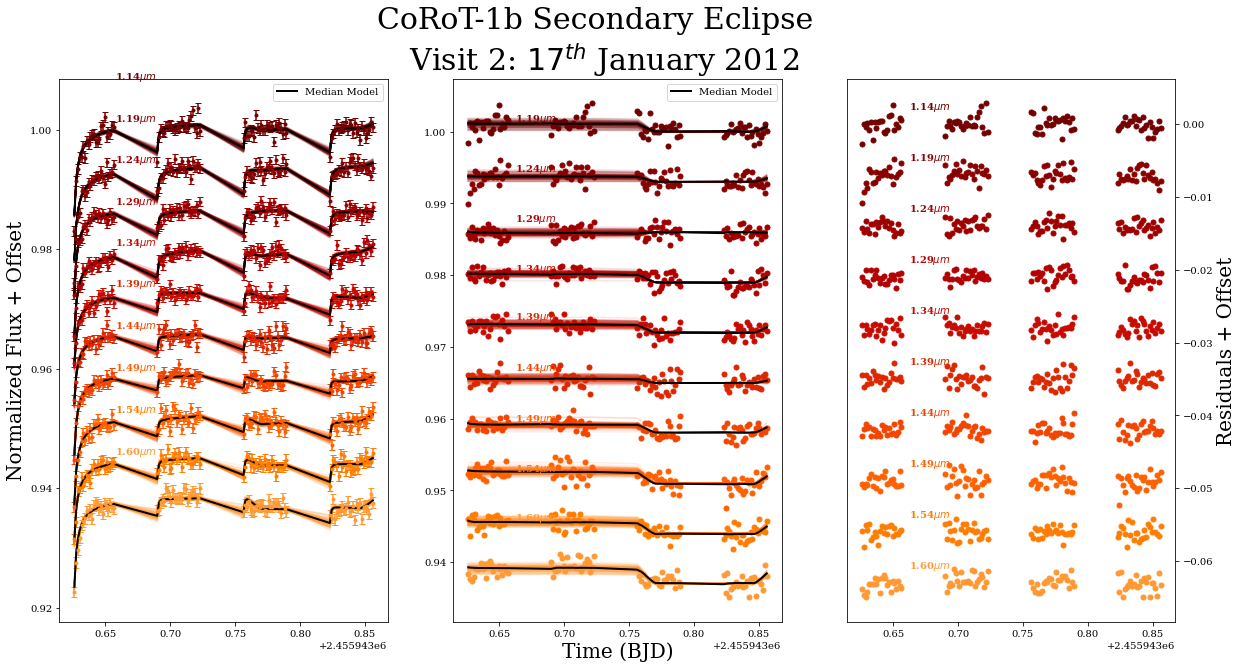

In [41]:
info_v2 = corot1_visit2_results
exptime = info_v2['Exp Time'][0]
im = median_image_v2

start = time.time()
sampler_2 = MCMC(spec_v2,eclipse_model_RECTE,20000,nbins=10,recalculate=False,showPlot=False,LCPlot=True,Co_add_visit_check=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 732
Thin the Sampler Chain by: 65
(4144, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 365
Thin the Sampler Chain by: 59
(4648, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 298
Thin the Sampler Chain by: 54
(5096, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 469
Thin the Sampler Chain by: 61
(4480, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 251
Thin the Sampler Chain by: 54
(5110, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 247
Thin the Sampler Chain by: 51
(5418, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 265
Thin the Sampler Chain by: 56
(4928, 7)
(20000, 14, 7)
(280000, 7)

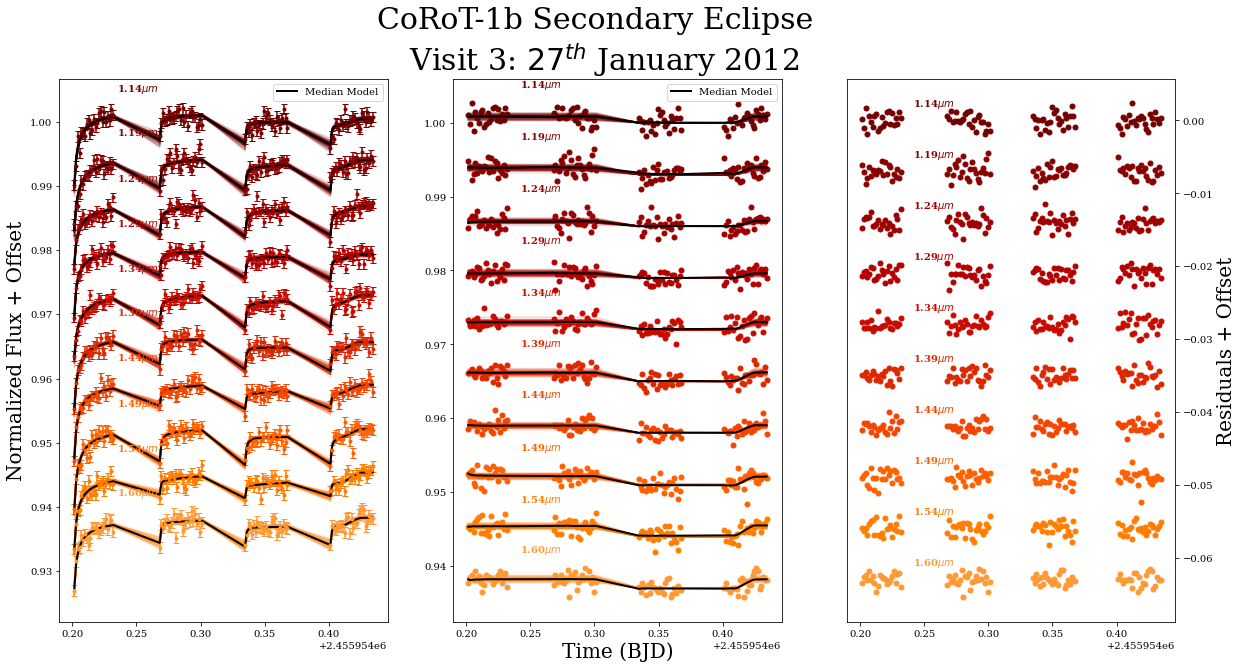

In [62]:
info_v3 = corot1_visit3_results
exptime = info_v3['Exp Time'][0]
im = median_image_v3

start = time.time()
sampler_3 = MCMC(spec_v3,eclipse_model_RECTE,20000,nbins=10,recalculate=False,showPlot=False,LCPlot=True,Co_add_visit_check=False)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 277
Thin the Sampler Chain by: 51
(5404, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 627
Thin the Sampler Chain by: 78
(3472, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 257
Thin the Sampler Chain by: 51
(5418, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 371
Thin the Sampler Chain by: 57
(4816, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 412
Thin the Sampler Chain by: 56
(4886, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 299
Thin the Sampler Chain by: 52
(5292, 7)
(20000, 14, 7)
(280000, 7)
Maximum Likelihood Estimation Took 0.0 Seconds
20000
The Burn-In Steps: 556
Thin the Sampler Chain by: 57
(4774, 7)
(20000, 14, 7)
(280000, 7)

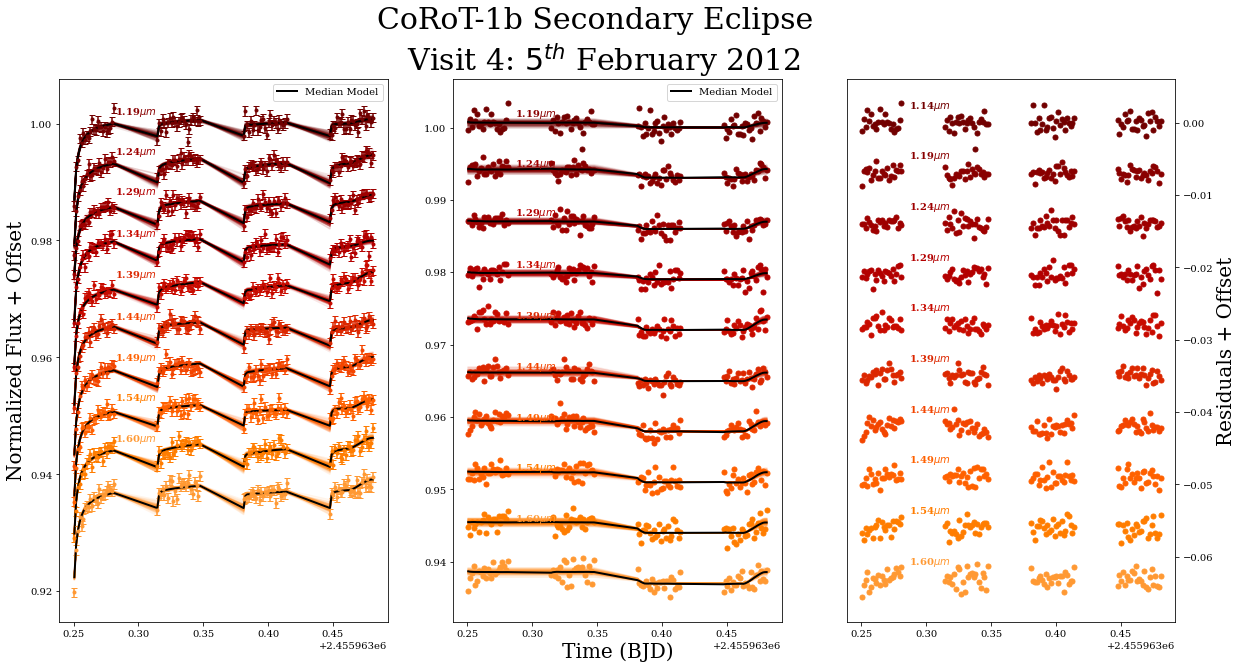

In [45]:
info_v4 = corot1_visit4_results
exptime = info_v4['Exp Time'][0]
im = median_image_v4

start = time.time()
sampler_4 = MCMC(spec_v4,eclipse_model_RECTE,20000,nbins=10,recalculate=False,showPlot=False,LCPlot=True,Co_add_visit_check=True)
end= time.time()
print(f"Runtime of the program is {end - start} seconds")

# Transit & Eclipse Spectrums

In [55]:
#Wavelength Calibrations

#Obtain tables of wavelength bins for each visit, with theoretical noise and measured standard deviation across time.
table_noise_v1=spec_v1.print_noise_wavebin(nbins=10)
table_noise_v2=spec_v2.print_noise_wavebin(nbins=10)
table_noise_v3=spec_v3.print_noise_wavebin(nbins=10)
table_noise_v4=spec_v4.print_noise_wavebin(nbins=10)

#Wavelength calibration to turn the dispersion pixels into wavelengths. 
#CoRoT-1 b used wavecalMethod='wfc3Dispersion' for the HST WFC3 grism
wavelength_list_v1 = spec_v1.wavecal(table_noise_v1['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
wavelength_list_v2 = spec_v2.wavecal(table_noise_v2['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
wavelength_list_v3 = spec_v3.wavecal(table_noise_v3['Disp Mid'],waveCalMethod = 'wfc3Dispersion')
wavelength_list_v4 = spec_v4.wavecal(table_noise_v4['Disp Mid'],waveCalMethod = 'wfc3Dispersion')

In [56]:
#Visit 1 - 16,50,84 quantiles
q50_values_1=[item[0] for item in sampler_1[0]] #the mean value of the flux-to-planet-ratio `item[0]` for each wavelength in visit 1
lower_limit_1=[item[0] for item in sampler_1[1]] #the lower limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 1
upper_limit_1 = [item[0] for item in sampler_1[2]] #the upper limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 1

#Visit 2 - 16,50,84 quantiles
q50_values_2=[item[0] for item in sampler_2[0]] #the mean value of the flux-to-planet-ratio `item[0]` for each wavelength in visit 2
lower_limit_2=[item[0] for item in sampler_2[1]] #the lower limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 2
upper_limit_2 = [item[0] for item in sampler_2[2]] #the upper limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 2

#Visit 3 - 16,50,84 quantiles
q50_values_3=[item[0] for item in sampler_3[0]] #the mean value of the flux-to-planet-ratio `item[0]` for each wavelength in visit 3
lower_limit_3=[item[0] for item in sampler_3[1]] #the lower limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 3
upper_limit_3 = [item[0] for item in sampler_3[2]] #the upper limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 3

#Visit 4 - 16,50,84 quantiles
q50_values_4=[item[0] for item in sampler_4[0]] #the mean value of the flux-to-planet-ratio `item[0]` for each wavelength in visit 4
lower_limit_4=[item[0] for item in sampler_4[1]] #the lower limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 4
upper_limit_4 = [item[0] for item in sampler_4[2]] #the upper limit of the error bar for the flux-to-planet-ratio `item[0]` for each wavelength in visit 4

#Spitzer data Deming et al. 2011
spitzer_wavelengths=[3.6,4.5] #in microns
#spitzer_eclipse_depths=[(0.415/100)*1e6, (0.482/100)*1e6] #convert percent into decimal into ppm
spitzer_eclipse_depths = [4602, 4380] #ppm
#spitzer_eclipse_depths_errors=[(0.042/100)*1e6, (0.042/100)*1e6] #convert percent into decimal into ppm
spitzer_eclipse_depths_errors = [477, 440] #ppm

#Average all three eclipse visits together
average_lower_limit = [(g+h+k) / 3 for g,h,k in zip(lower_limit_2,lower_limit_3,lower_limit_4)] #average the lower limit of the error bars
average_upper_limit = [(g+h+k) / 3 for g,h,k in zip(upper_limit_2,upper_limit_3,upper_limit_4)] #average the upper limits of the error bars
average_q50_values = [(g+h+k) / 3 for g,h,k in zip(q50_values_2,q50_values_3,q50_values_4)] #average the flux-to-planet ratio of all visits for all wavelengths
average_wavelengths = [(g+h+k) / 3 for g,h,k in zip(wavelength_list_v2,wavelength_list_v3,wavelength_list_v4)] #average the wavelengths 

#Read in Mike Line Theroretical Model Data
redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")
redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_spec.csv',sep=" ")

# Model TP profile
TP_redist_266=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.66_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")
TP_redist_2=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_2.0_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")
TP_redist_1=pd.read_csv('Mike_Line_Theoretical_Data/COROT-1b_redist_1.0_logZ_+0.0_CtoO_0.55_ATM.csv',sep=" ")

#Abundance Ratios
H20 = TP_redist_266['H2O'].values
CH4 = TP_redist_266['CH4'].values
CO = TP_redist_266['CO'].values
CO2 = TP_redist_266['CO2'].values


In [253]:
array_tuple =(np.array(q50_values_2),np.array(q50_values_3),np.array(q50_values_4))
arrays = np.vstack(array_tuple)

point1 = [item[0] for item in arrays]
point2 = [item[1] for item in arrays]
point3 = [item[2] for item in arrays]
point4 = [item[3] for item in arrays]
point5 = [item[4] for item in arrays]
point6 = [item[5] for item in arrays]
point7 = [item[6] for item in arrays]
point8 = [item[7] for item in arrays]
point9= [item[8] for item in arrays]
point10 = [item[9] for item in arrays]


In [266]:
print("The max for point 1 is:" +str(np.max(point1)-np.min(point1)))
print("The max for point 2 is:" +str(np.max(point2)-np.min(point2)))
print("The max for point 3 is:" +str(np.max(point3)-np.min(np.absolute(point3))))
print("The max for point 4 is:" +str(np.max(point4)-np.min(point4)))
print("The max for point 5 is:" +str(np.max(point5)-np.min(point5)))
print("The max for point 6 is:" +str(np.max(point6)-np.min(point6)))
print("The max for point 7 is:" +str(np.max(point7)-np.min(point7)))
print("The max for point 8 is:" +str(np.max(point8)-np.min(point8)))
print("The max for point 9 is:" +str(np.max(point9)-np.min(point9)))


The max for point 1 is:241.74002393595254
The max for point 2 is:626.4084292095031
The max for point 3 is:816.3009440225577
The max for point 4 is:614.422033125001
The max for point 5 is:512.8763134662208
The max for point 6 is:696.8544834332658
The max for point 7 is:488.4095206542039
The max for point 8 is:462.9974251773324
The max for point 9 is:249.42389552713234


In [41]:
co=[793.3916867086032,
 896.9974493896316,
 559.8257508387255,
 745.8651312869113,
 894.1795633213894,
 1002.3091175998196,
 1039.8652435186607,
 1180.393441935215,
 1414.5106754111957,
 1307.3657466496672]

In [42]:
ww=np.array(average_q50_values)
ww1=np.array(co)

In [43]:
ww-ww1

array([-65.70785339, -40.71992997, -65.71584044, 143.64342287,
       236.85685716, -88.21582526, 140.06280153, 153.28477783,
        24.33190936, 317.95562896])

In [57]:
spectra_results = 'opt_result_tables/CoRoT-1b_Averaged_Eclipse_Spectra_Data.txt'
Spectra_Data = Table()
Spectra_Data['Wavelength [um]'] = average_wavelengths
Spectra_Data['Fp/Fstar [ppm]'] = average_q50_values
Spectra_Data['Fp/Fstar_err_lower [ppm]'] = average_lower_limit
Spectra_Data['Fp/Fstar_err_upper [ppm]'] = average_upper_limit
Spectra_Data.write(spectra_results,format="ascii") #save the table 

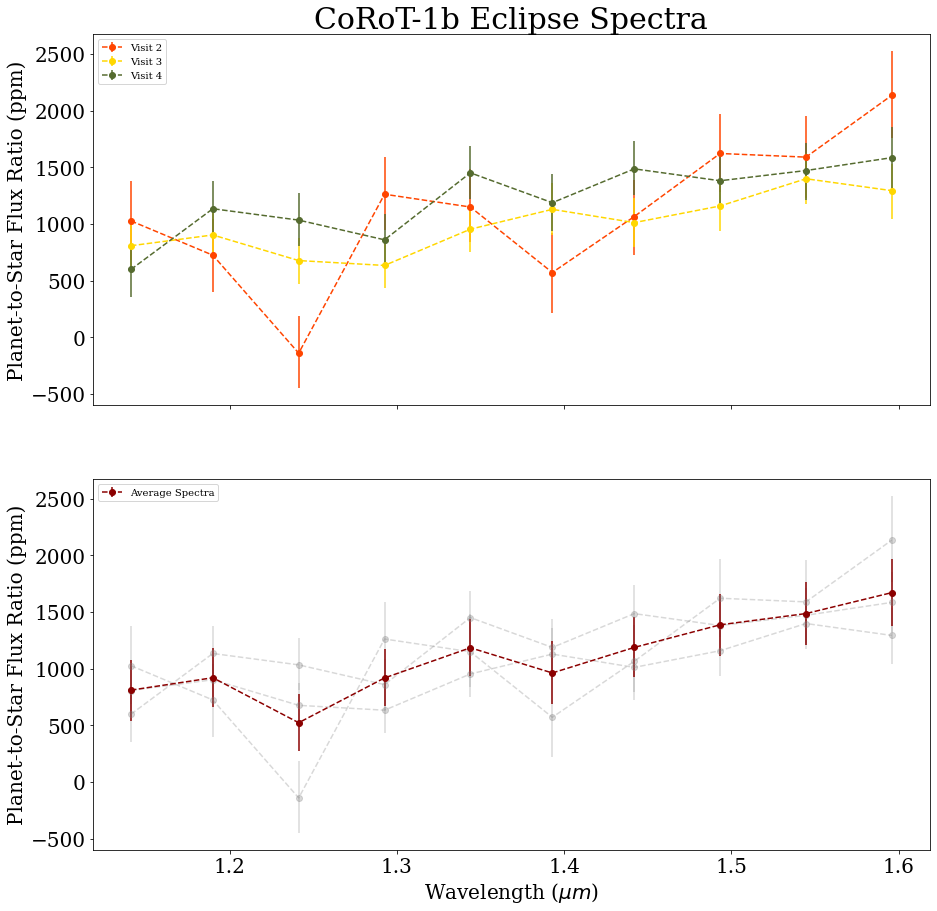

In [58]:
#Plot The Eclipse Spectra

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15), sharex=True) #set up the figure space

#Plot each visit's secondary eclipse spectra overlaid. 
ax1.errorbar(wavelength_list_v2,q50_values_2,yerr=[lower_limit_2, upper_limit_2],label='Visit 2',fmt='--o', color='orangered')
ax1.errorbar(wavelength_list_v3,q50_values_3,yerr=[lower_limit_3, upper_limit_3],label='Visit 3',fmt='--o', color='gold')
ax1.errorbar(wavelength_list_v4,q50_values_4,yerr=[lower_limit_4, upper_limit_4],label='Visit 4',fmt='--o', color='darkolivegreen')
ax1.legend(loc="upper left")

#Plot the average secondary eclipse spectra
ax2.errorbar(wavelength_list_v2,q50_values_2,yerr=[lower_limit_2, upper_limit_2],fmt='--o', color='grey', alpha=0.3) #original specta faded for reference 
ax2.errorbar(wavelength_list_v3,q50_values_3,yerr=[lower_limit_3, upper_limit_3],fmt='--o', color='grey', alpha=0.3) #original specta faded for reference
ax2.errorbar(wavelength_list_v4,q50_values_4,yerr=[lower_limit_4, upper_limit_4],fmt='--o', color='grey', alpha=0.3) #original specta faded for reference
ax2.errorbar(average_wavelengths,average_q50_values,yerr=[average_lower_limit,average_upper_limit],label='Average Spectra',fmt='--o', color="darkred")
ax2.legend(loc="upper left")

#Plot labels
ax1.set_title("CoRoT-1b Eclipse Spectra", fontsize = 30)
ax1.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=20)
ax2.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=20)
ax2.set_xlabel("Wavelength ($\mu m$)", fontsize=20)
ax1.tick_params(axis = 'both',labelsize = 20)
ax2.tick_params(axis = 'both',labelsize = 20)


fig.savefig('saved_figures/CoRoT-1b_MCMC_Eclipse_Spectra.pdf', bbox_inches='tight')


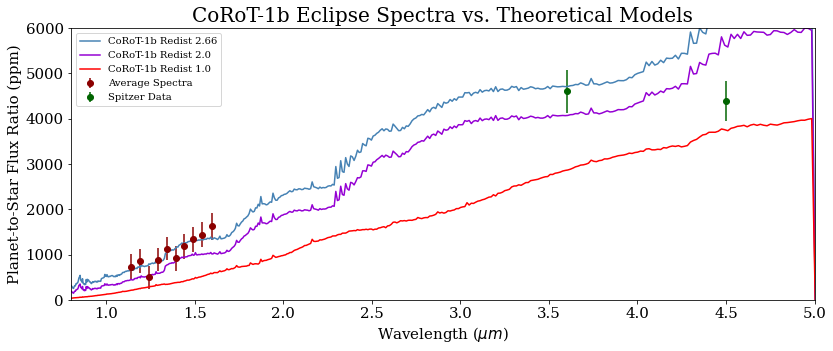

In [45]:
# Plot The Eclipse Spectra against CHIMERA models
fig, ax2 = plt.subplots(figsize=(960/72,360/72)) #set up the figure space

ax2.errorbar(average_wavelengths,average_q50_values,yerr=[average_lower_limit,average_upper_limit],label='Average Spectra',fmt='o', color="darkred") #calculated average secondary eclipse spectra
ax2.errorbar(spitzer_wavelengths,spitzer_eclipse_depths,yerr=spitzer_eclipse_depths_errors,label='Spitzer Data',fmt='o', color='darkgreen') #Spitzer data 
ax2.plot(redist_266['#Wavelength[um]'],redist_266['Fp/Fstar[ppm]'],label="CoRoT-1b Redist 2.66",color='steelblue') #No Heat Redistribution Secondary Eclipse Model for CoRoT-1 b
ax2.plot(redist_2['#Wavelength[um]'],redist_2['Fp/Fstar[ppm]'],label='CoRoT-1b Redist 2.0',color='darkviolet') #Dayside Only Heat Redistribution Secondary Eclipse Model for CoRoT-1 b
ax2.plot(redist_1['#Wavelength[um]'],redist_1['Fp/Fstar[ppm]'],label='CoRoT-1b Redist 1.0',color='red') #Full Heat Redistribution Secondary Eclipse Model for CoRoT-1 b
ax2.legend()

#Plot labels/limits
ax2.set_xlim(0.8,5)
ax2.set_ylim(0,6000)

ax2.set_title("CoRoT-1b Eclipse Spectra vs. Theoretical Models", fontsize = 20)
ax2.set_ylabel("Planet-to-Star Flux Ratio (ppm)", fontsize=15)
ax2.set_xlabel("Wavelength ($\mu m$)", fontsize=15)
ax2.tick_params(axis = 'both',labelsize = 15)


fig.savefig('saved_figures/CoRoT-1b_MCMC_Theoretical_Eclipse_Spectra.jpeg')

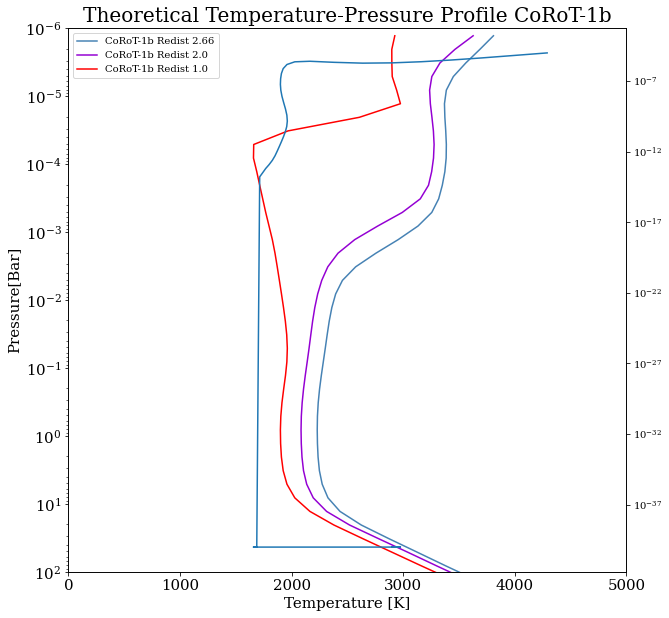

In [46]:
# Plot The T-P Profile CHIMERA models corresponding to the secondary eclipse spectra models. 

fig,ax=plt.subplots(figsize=(10,10)) #set up the figure space
ax2=ax.twinx()
ax.plot(TP_redist_266['T[K]'],TP_redist_266['P[bar]'],color='steelblue', label='CoRoT-1b Redist 2.66') #No Heat Redistribution Secondary Eclipse Model for CoRoT-1 b
ax.plot(TP_redist_2['T[K]'],TP_redist_2['P[bar]'], color='darkviolet', label='CoRoT-1b Redist 2.0') #Dayside Only Heat Redistribution Secondary Eclipse Model for CoRoT-1 b
ax.plot(TP_redist_1['T[K]'],TP_redist_1['P[bar]'], color='red', label='CoRoT-1b Redist 1.0') #Full Heat Redistribution Secondary Eclipse Model for CoRoT-1 b

ax2.plot(TP_redist_1['T[K]'],TP_redist_1['CH4'].values)

#Plot labels/limits
ax.set_xlim(0,5000)
ax.set_ylim(10**2, 10**-6)
ax.set_yscale('log')

ax2.set_yscale('log')
#ax2.set_xlim(0, 5000)
#ax2.set_ylim(10**2, 10**-6)





ax.legend()
ax.set_title("Theoretical Temperature-Pressure Profile CoRoT-1b", fontsize=20)
ax.set_ylabel("Pressure[Bar]", fontsize=15)
ax.set_xlabel("Temperature [K]", fontsize=15)
ax.tick_params(axis = 'both',labelsize = 15)


#fig.savefig('saved_figures/CoRoT-1b_MCMC_Theoretical_TP_Profile.jpeg')

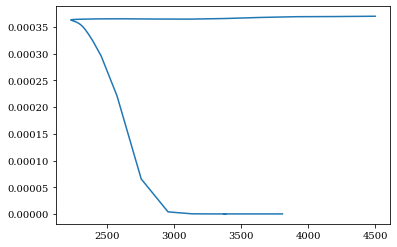

In [47]:
plt.plot(TP_redist_266['T[K]'],H20
)

In [51]:
q50_values_1

[0.14542144840860302,
 0.1440569911623583,
 0.14329477393606596,
 0.1454394264054774,
 0.14383045658241583,
 0.14752557697331323,
 0.14717231142188023,
 0.14194539832242598,
 0.13862183280031398,
 0.13867425235353492]

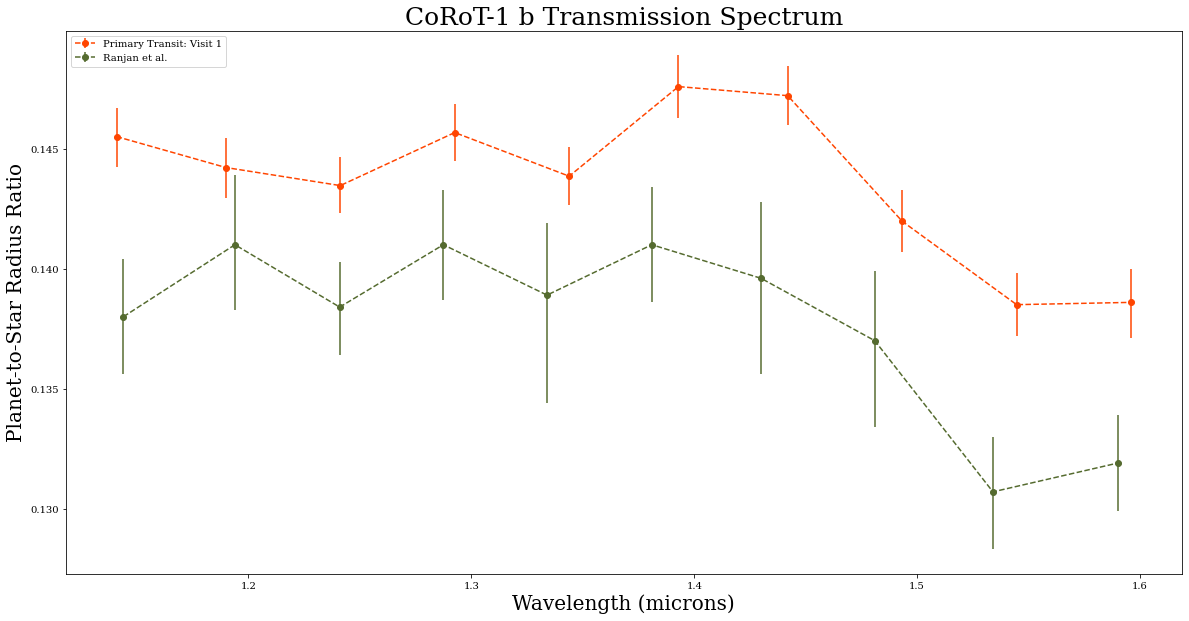

In [64]:
ranjan_rp = [0.1380, 0.1410, 0.1384, 0.1410, 0.1389, 0.1410, 0.1396, 0.1370, 0.1307, 0.1319]
ranjan_wavelength_st =[1.118,1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561]
ranjan_wavelength_end=[1.170,1.218,1.264,1.311,1.357,1.405,1.455,1.507,1.561,1.619]
ranjan_upper_limit = [0.0024,0.0029,0.0019,0.0023,0.0030,0.0024,0.0032,0.0029,0.0023,0.0020]
ranjan_lower_limit = [0.0024,0.0027,0.0020,0.0023,0.0045,0.0024,0.0040,0.0036,0.0024,0.0020]
ranjan_avg_wavelength=[(g + h) / 2 for g, h in zip(ranjan_wavelength_st, ranjan_wavelength_end)]

fig, ax = plt.subplots(1,figsize=(20,10))

ax.errorbar(wavelength_list_v1,q50_values_1,yerr=[lower_limit_1,upper_limit_1],label='Primary Transit: Visit 1', fmt='--o', color='orangered')
ax.set_title('CoRoT-1 b Transmission Spectrum', fontsize=25)
ax.set_xlabel('Wavelength (microns)', fontsize=20)
ax.set_ylabel('Planet-to-Star Radius Ratio', fontsize=20)
ax.errorbar(ranjan_avg_wavelength,ranjan_rp,yerr=[ranjan_lower_limit,ranjan_upper_limit], fmt='--o',label='Ranjan et al.', color='darkolivegreen') #put in ranjan wavelengths
ax.legend(loc ='upper left') 


fig.savefig('saved_figures/MCMC_ranjan_transit_spectrum_comparison.pdf')

In [49]:
np.array(q50_values_1)**2

array([0.0211474 , 0.02075242, 0.02053339, 0.02115263, 0.0206872 ,
       0.0217638 , 0.02165969, 0.0201485 , 0.01921601, 0.01923055])

In [50]:
q50_values_1

[0.14542144840860302,
 0.1440569911623583,
 0.14329477393606596,
 0.1454394264054774,
 0.14383045658241583,
 0.14752557697331323,
 0.14717231142188023,
 0.14194539832242598,
 0.13862183280031398,
 0.13867425235353492]

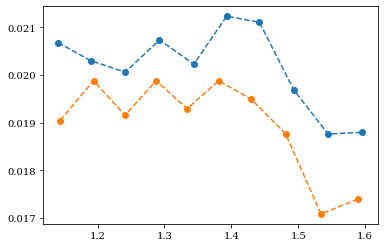

In [93]:
plt.plot(wavelength_list_v1,np.array(q50_values_1)**2,'--o')
plt.plot(ranjan_avg_wavelength,np.array(ranjan_rp)**2,'--o')